In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

sns.set_theme(style='whitegrid')

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['figure.dpi']= 300

In [3]:
# load data from files
temp = np.loadtxt('/home/shashank/Code/gonihedric/bin/dataL20k0.000000', dtype=np.float32)

In [ ]:
temps = []  # Initialize an empty array to store unique temperatures
for i in range(len(temp[:,0])):
    if temp[i,0] not in temps:
        print(temp[i,0])
        temps.append(temp[i,0].item())

temps = np.array(temps, dtype=np.float32)
print(temps.shape[0])

In [3]:
def computeMeansAndStds(filepath:str):
    temp = np.loadtxt(filepath, dtype=np.float32)
    np.sort(temp, axis=0)
    
    temps = []  # Initialize an empty array to store unique temperatures
    for i in range(len(temp[:,0])):
        if temp[i,0] not in temps:
            temps.append(temp[i,0].item())

    temps = np.array(temps, dtype=np.float32)
    temperatures = temps.shape[0]

    j = 0
    vals1 = []; vals2 = []
    meanData = np.empty((temperatures, 2))
    stdData = np.empty((temperatures, 2))
    temps = []
    for i in range(len(temp[:,0])):
        vals1.append(temp[i,1])
        vals2.append(temp[i,2])
        if temp[i,0] not in temps:
            meanData[j,0]=np.mean(vals1); stdData[j,0] = np.std(vals1)
            meanData[j,1]=np.mean(vals2); stdData[j,1] = np.std(vals2)
            j += 1; temps.append(temp[i,0].item())
            vals1 = []; vals2 = []
    temps = np.array(temps, dtype=np.float32)
    return temps, meanData, stdData

def specificHeatCapacity(energyStd, Temp, L=20):
    specificHeatCapacity = np.empty(len(Temp))
    for i in range(len(Temp)):
        specificHeatCapacity[i] = L*L*L * energyStd[i]**2 * (Temp[i]**2)
    return specificHeatCapacity

def susceptibility(magStd, Temp, L=20):
    susceptibility = np.empty(len(Temp))
    for i in range(len(Temp)):
        susceptibility[i] = L*L*L * magStd[i]**2 * Temp[i]
    return susceptibility

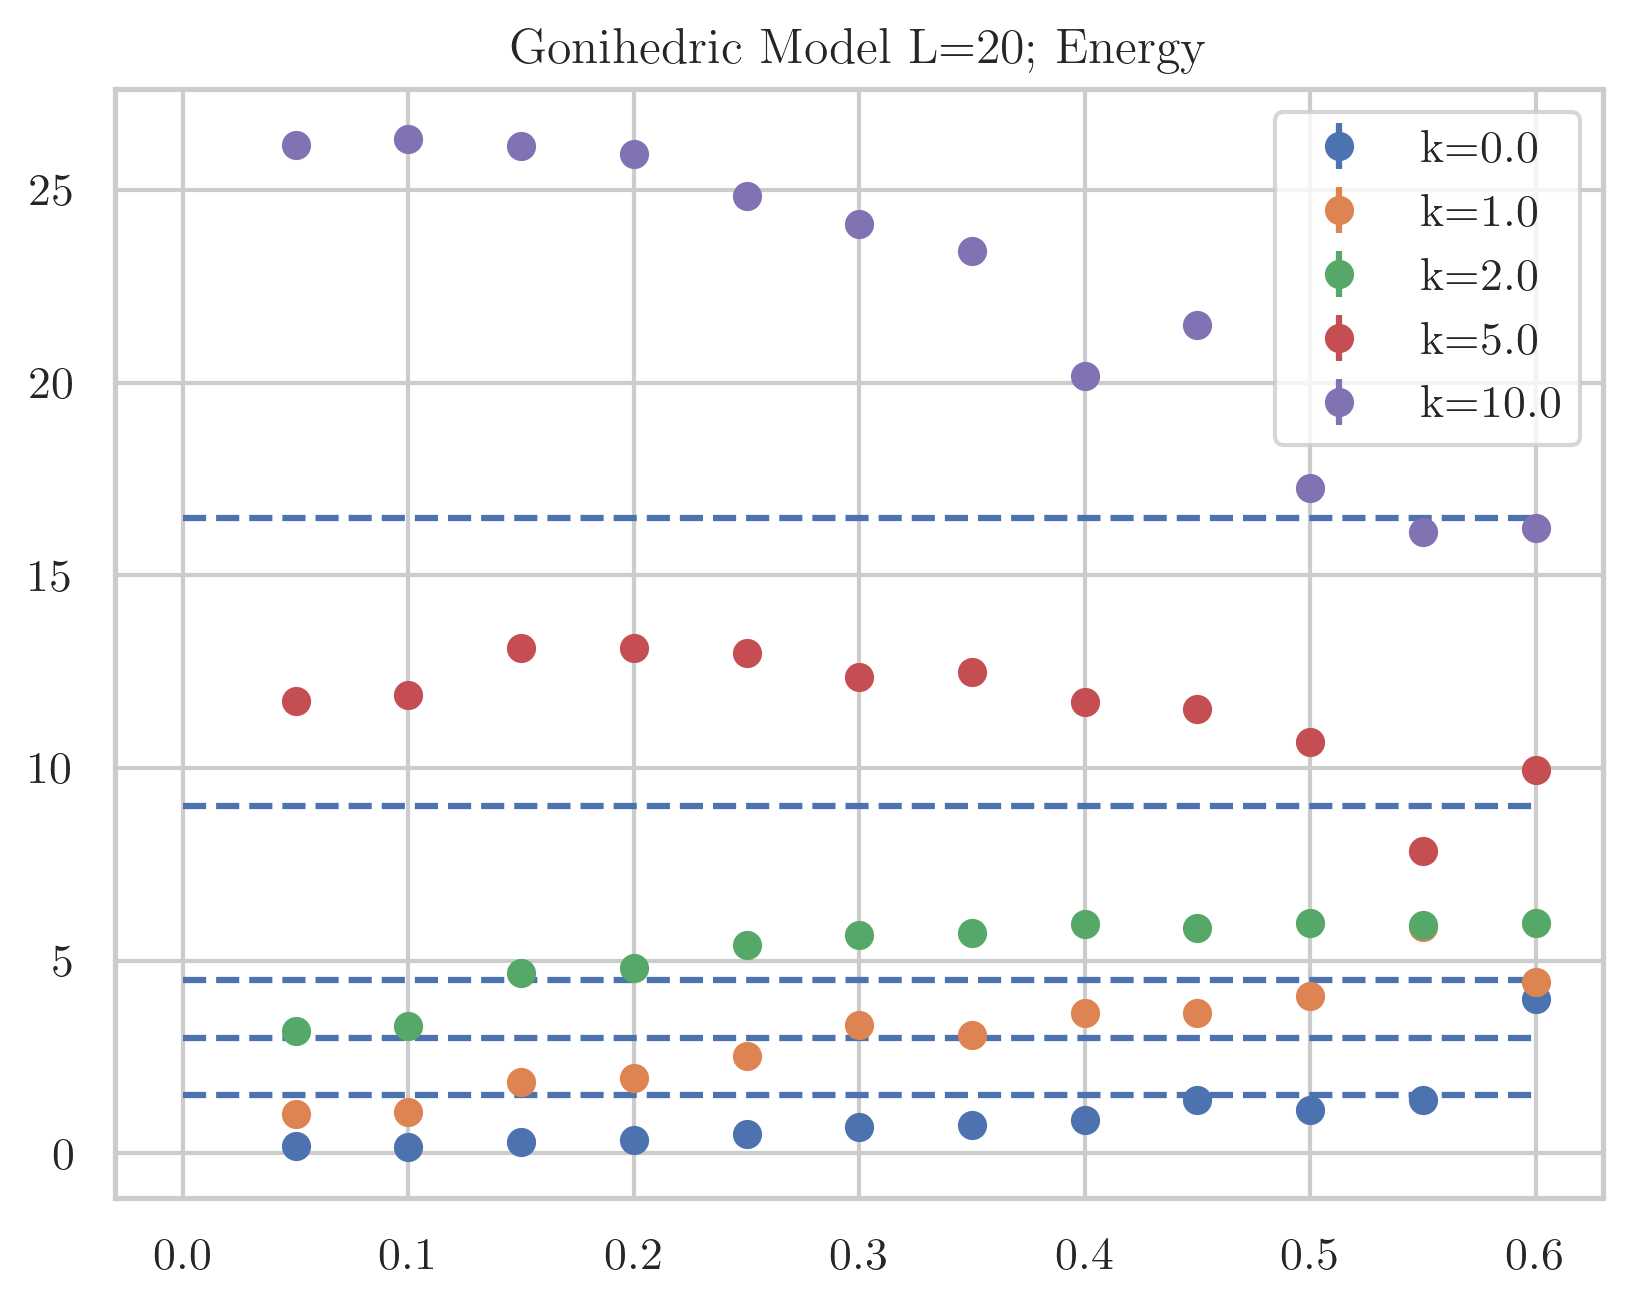

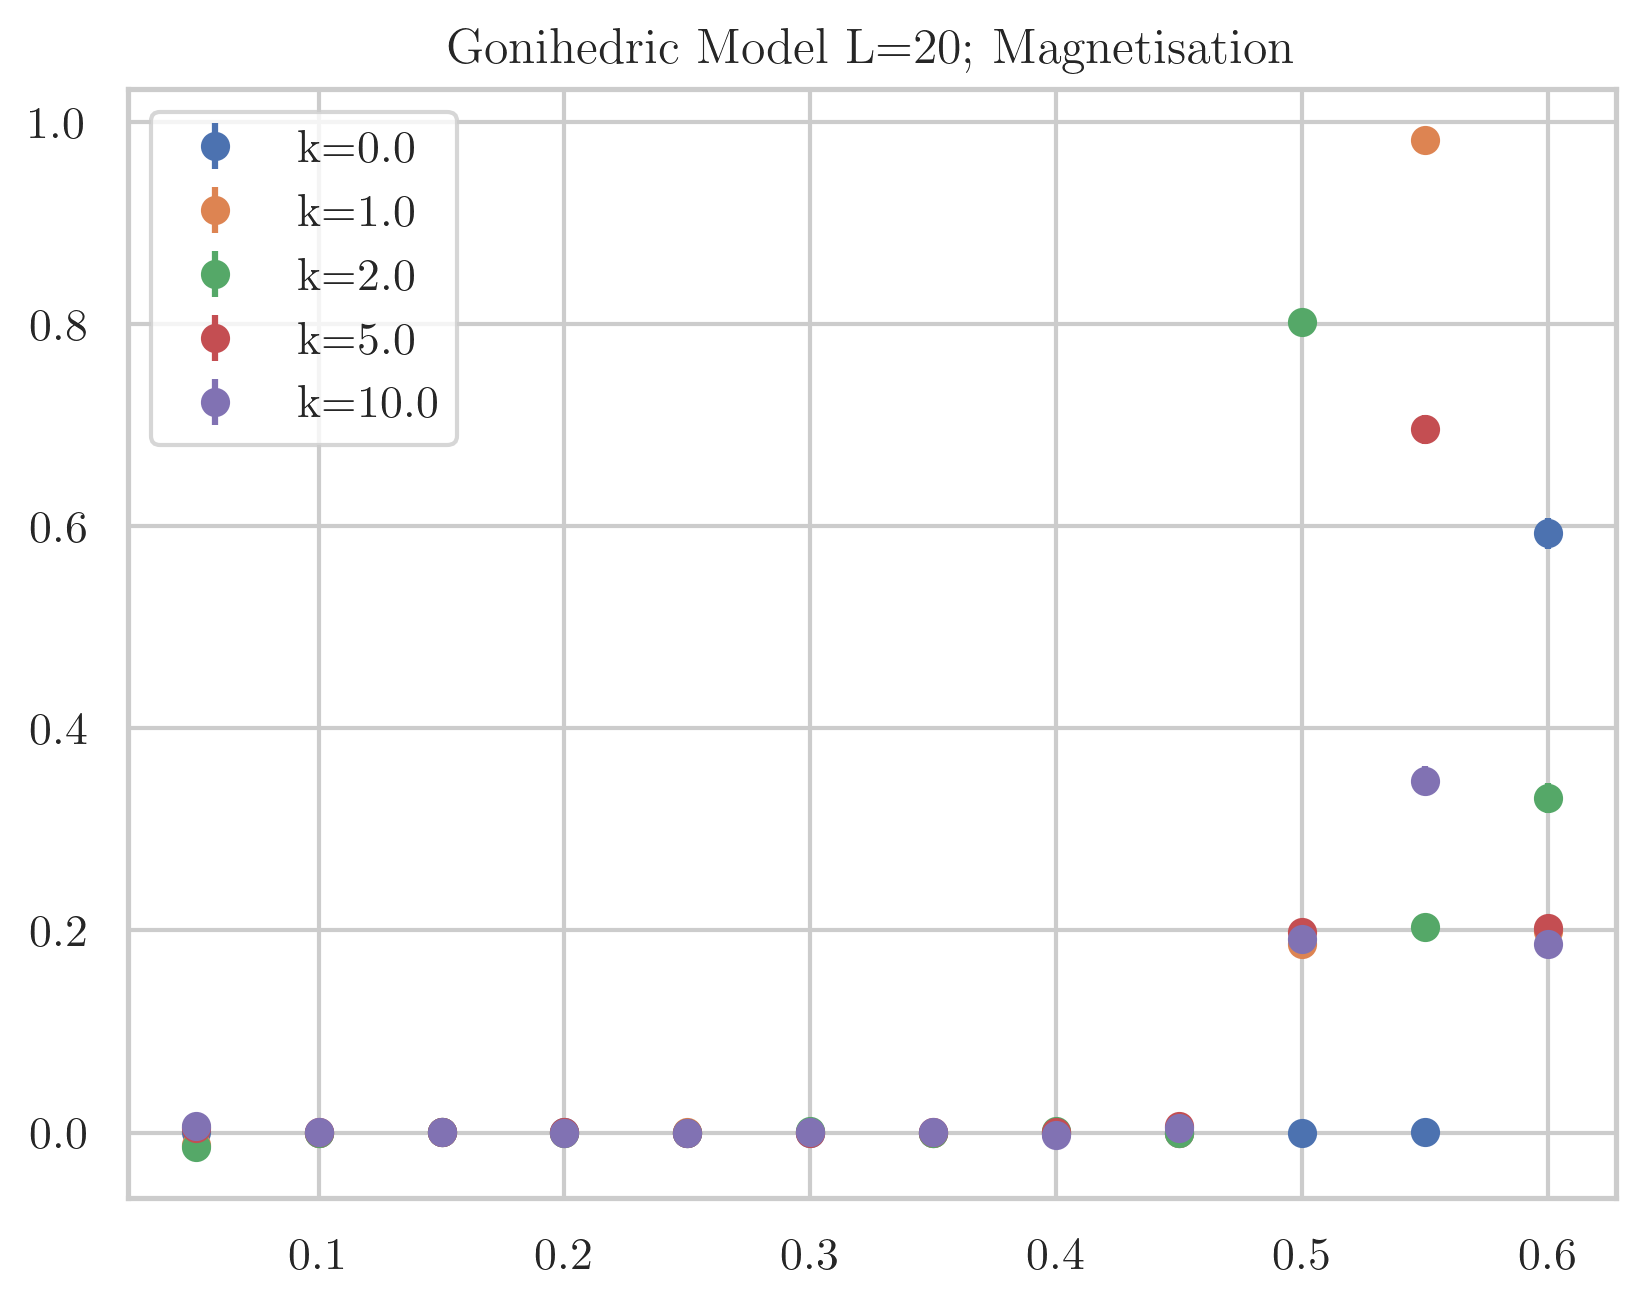

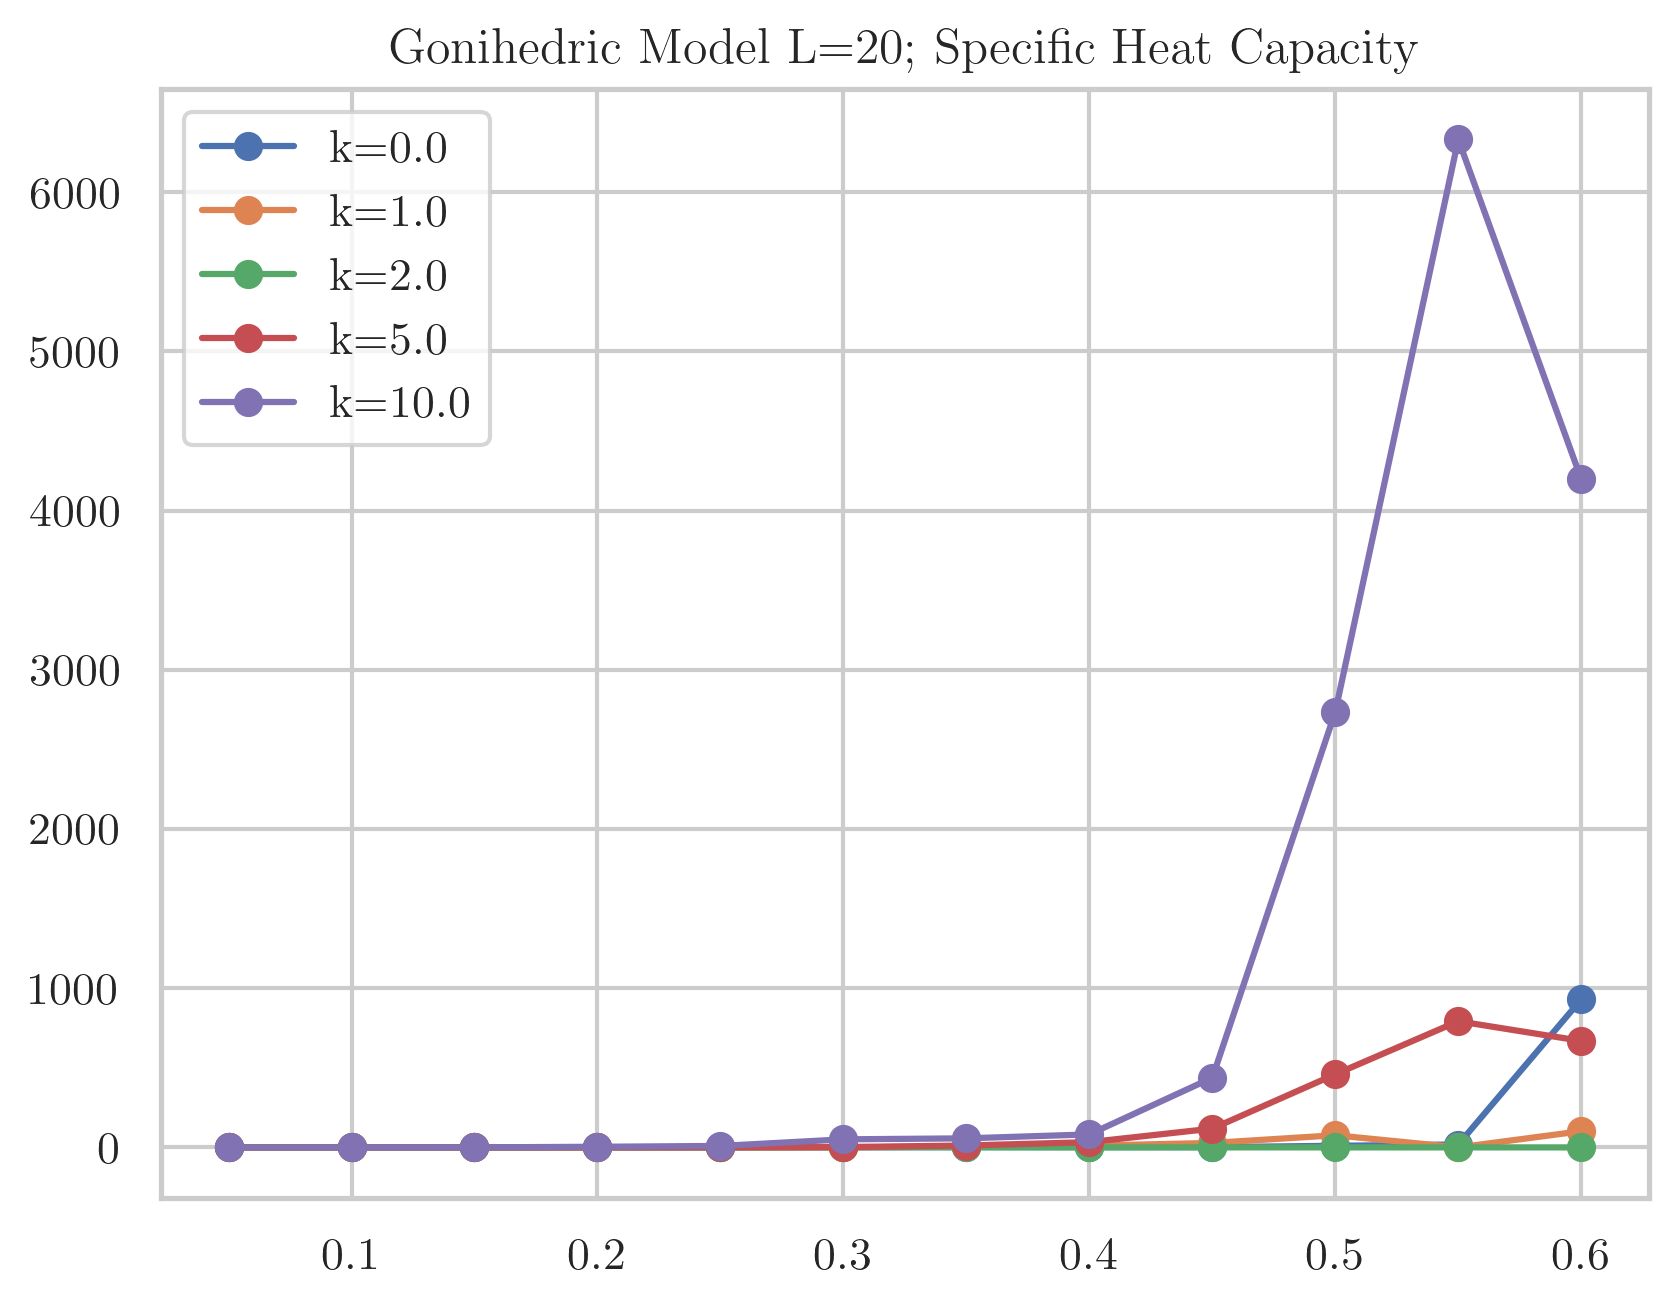

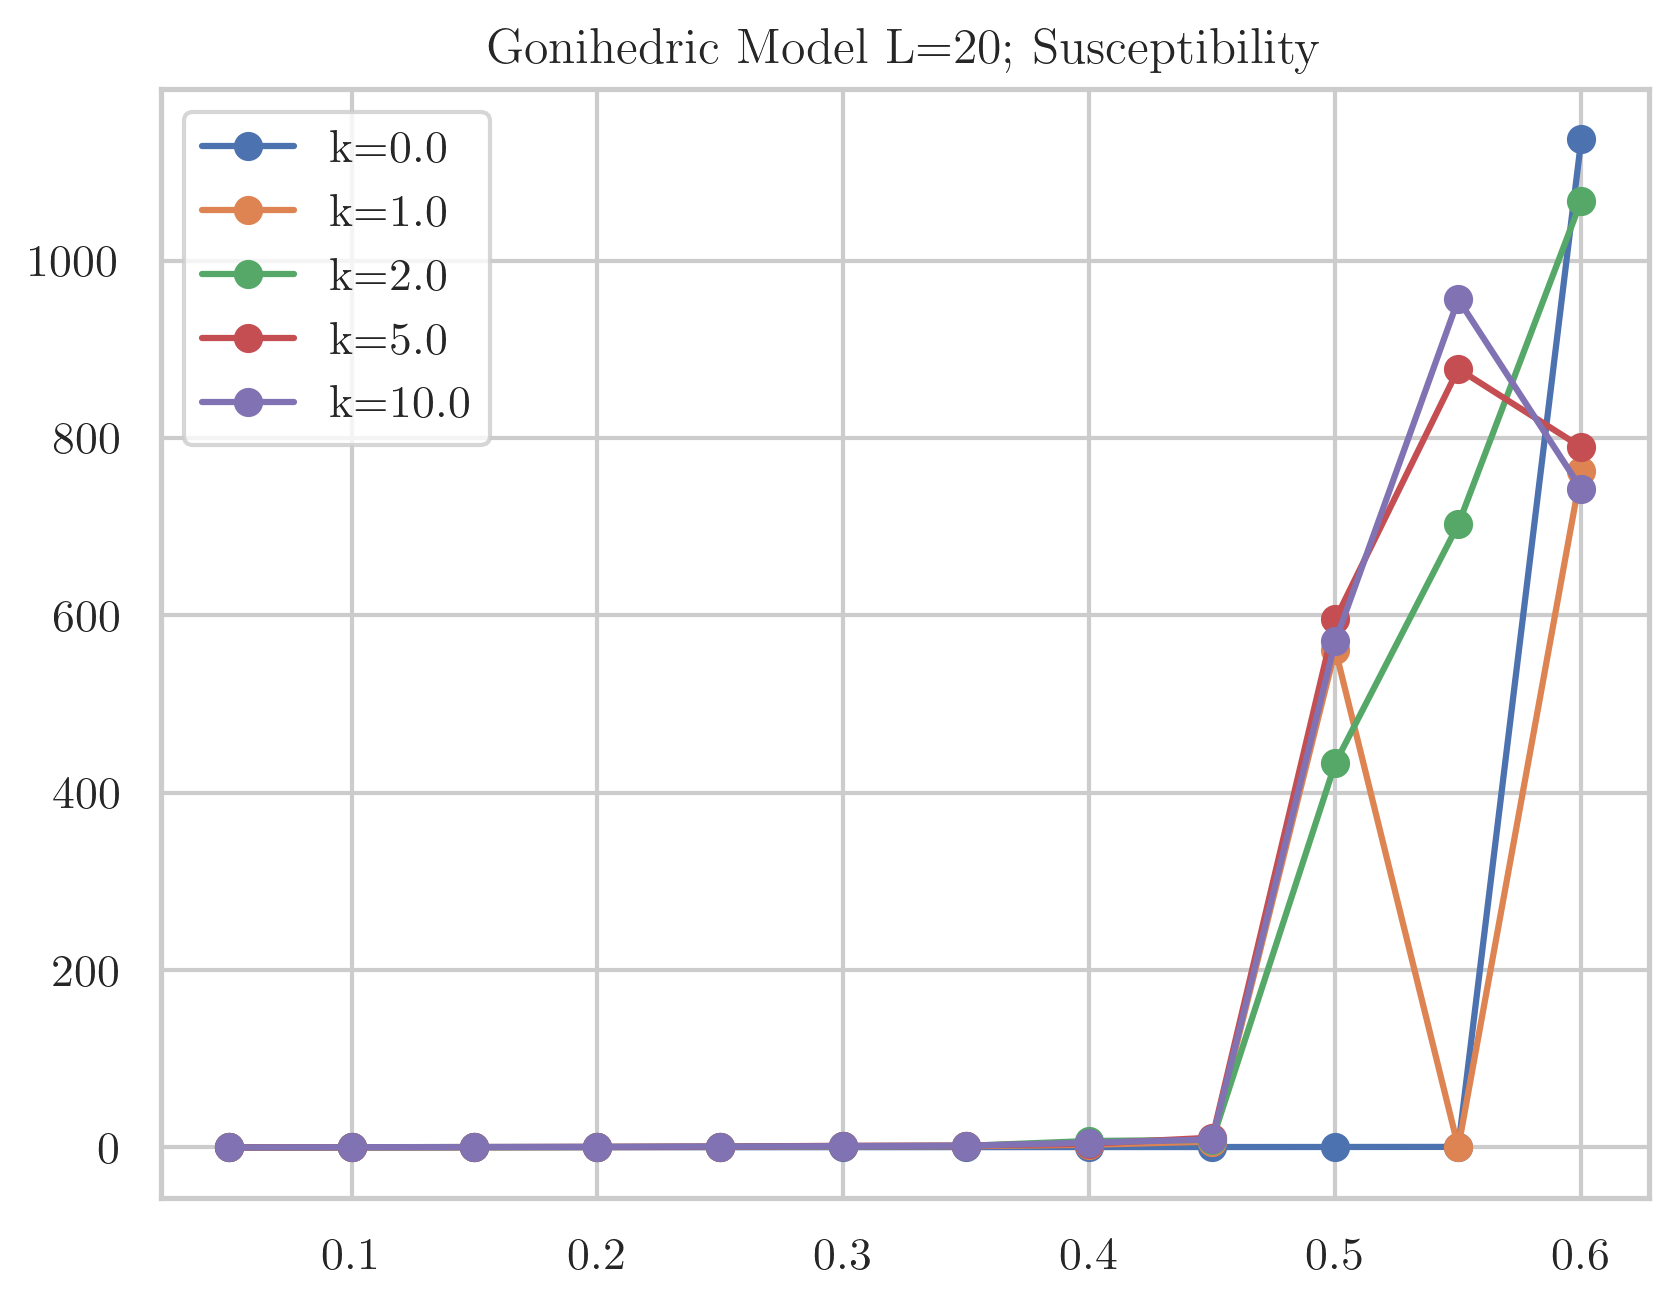

In [5]:
# temps, meanData0, stdData0 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k0.000000')
# temps, meanData1, stdData1 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k1.000000')
# temps, meanData2, stdData2 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k2.000000')
# temps, meanData5, stdData5 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k5.000000')
# temps, meanData10, stdData10 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k10.000000')

plt.title('Gonihedric Model L=20; Energy')
plt.errorbar(temps, -4*meanData0[:,1], yerr=stdData0[:,1]/np.sqrt(1000), fmt='o', label='k=0.0')
plt.errorbar(temps, -4*meanData1[:,1], yerr=stdData1[:,1]/np.sqrt(1000), fmt='o', label='k=1.0')
plt.errorbar(temps, -4*meanData2[:,1], yerr=stdData2[:,1]/np.sqrt(1000), fmt='o', label='k=2.0')
plt.errorbar(temps, -4*meanData5[:,1], yerr=stdData5[:,1]/np.sqrt(1000), fmt='o', label='k=5.0')
plt.errorbar(temps, -4*meanData10[:,1], yerr=stdData10[:,1]/np.sqrt(1000), fmt='o', label='k=10.0')
for k in [0.0, 1.0, 2.0, 5.0, 10.0]: 
    plt.hlines(3*(1+k)/2, xmin=0, xmax=0.6, linestyles='dashed')
plt.legend()
# plt.ylim(-1,22)
plt.show()

plt.title('Gonihedric Model L=20; Magnetisation')
plt.errorbar(temps, meanData0[:,0], yerr=stdData0[:,0]/np.sqrt(1000), fmt='o', label='k=0.0')
plt.errorbar(temps, meanData1[:,0], yerr=stdData1[:,0]/np.sqrt(1000), fmt='o', label='k=1.0')
plt.errorbar(temps, meanData2[:,0], yerr=stdData2[:,0]/np.sqrt(1000), fmt='o', label='k=2.0')
plt.errorbar(temps, meanData5[:,0], yerr=stdData5[:,0]/np.sqrt(1000), fmt='o', label='k=5.0')
plt.errorbar(temps, meanData10[:,0], yerr=stdData10[:,0]/np.sqrt(1000), fmt='o', label='k=10.0')
plt.legend()
plt.show()

plt.title('Gonihedric Model L=20; Specific Heat Capacity')
plt.plot(temps, specificHeatCapacity(stdData0[:,1], temps, 20), 'o-', label='k=0.0')
plt.plot(temps, specificHeatCapacity(stdData1[:,1], temps, 20), 'o-', label='k=1.0')
plt.plot(temps, specificHeatCapacity(stdData2[:,1], temps, 20), 'o-', label='k=2.0')
plt.plot(temps, specificHeatCapacity(stdData5[:,1], temps, 20), 'o-', label='k=5.0')
plt.plot(temps, specificHeatCapacity(stdData10[:,1], temps, 20), 'o-', label='k=10.0')
plt.legend()
plt.show()

plt.title('Gonihedric Model L=20; Susceptibility')
plt.plot(temps, susceptibility(stdData0[:,0], temps, 20), 'o-', label='k=0.0')
plt.plot(temps, susceptibility(stdData1[:,0], temps, 20), 'o-', label='k=1.0')
plt.plot(temps, susceptibility(stdData2[:,0], temps, 20), 'o-', label='k=2.0')
plt.plot(temps, susceptibility(stdData5[:,0], temps, 20), 'o-', label='k=5.0')
plt.plot(temps, susceptibility(stdData10[:,0], temps, 20), 'o-', label='k=10.0')
plt.legend()
plt.show()

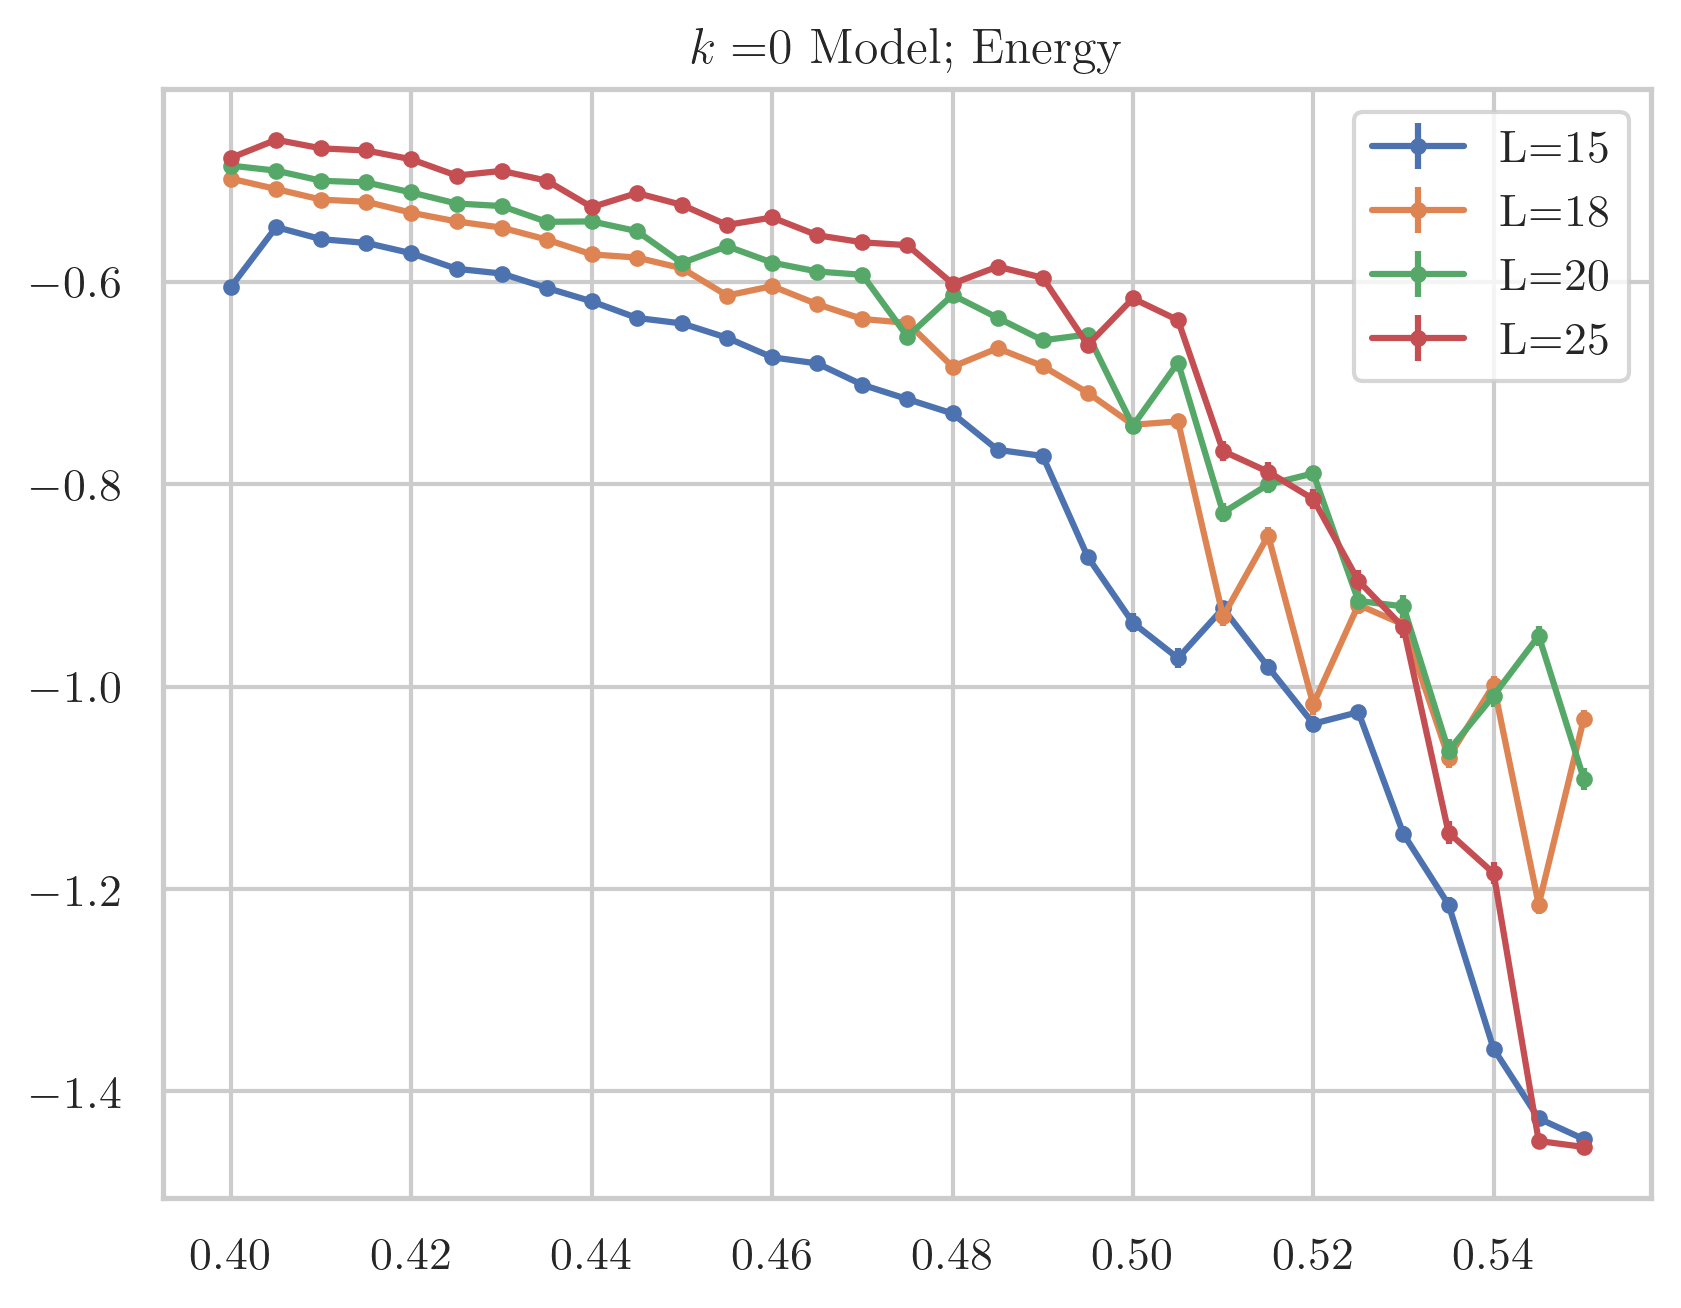

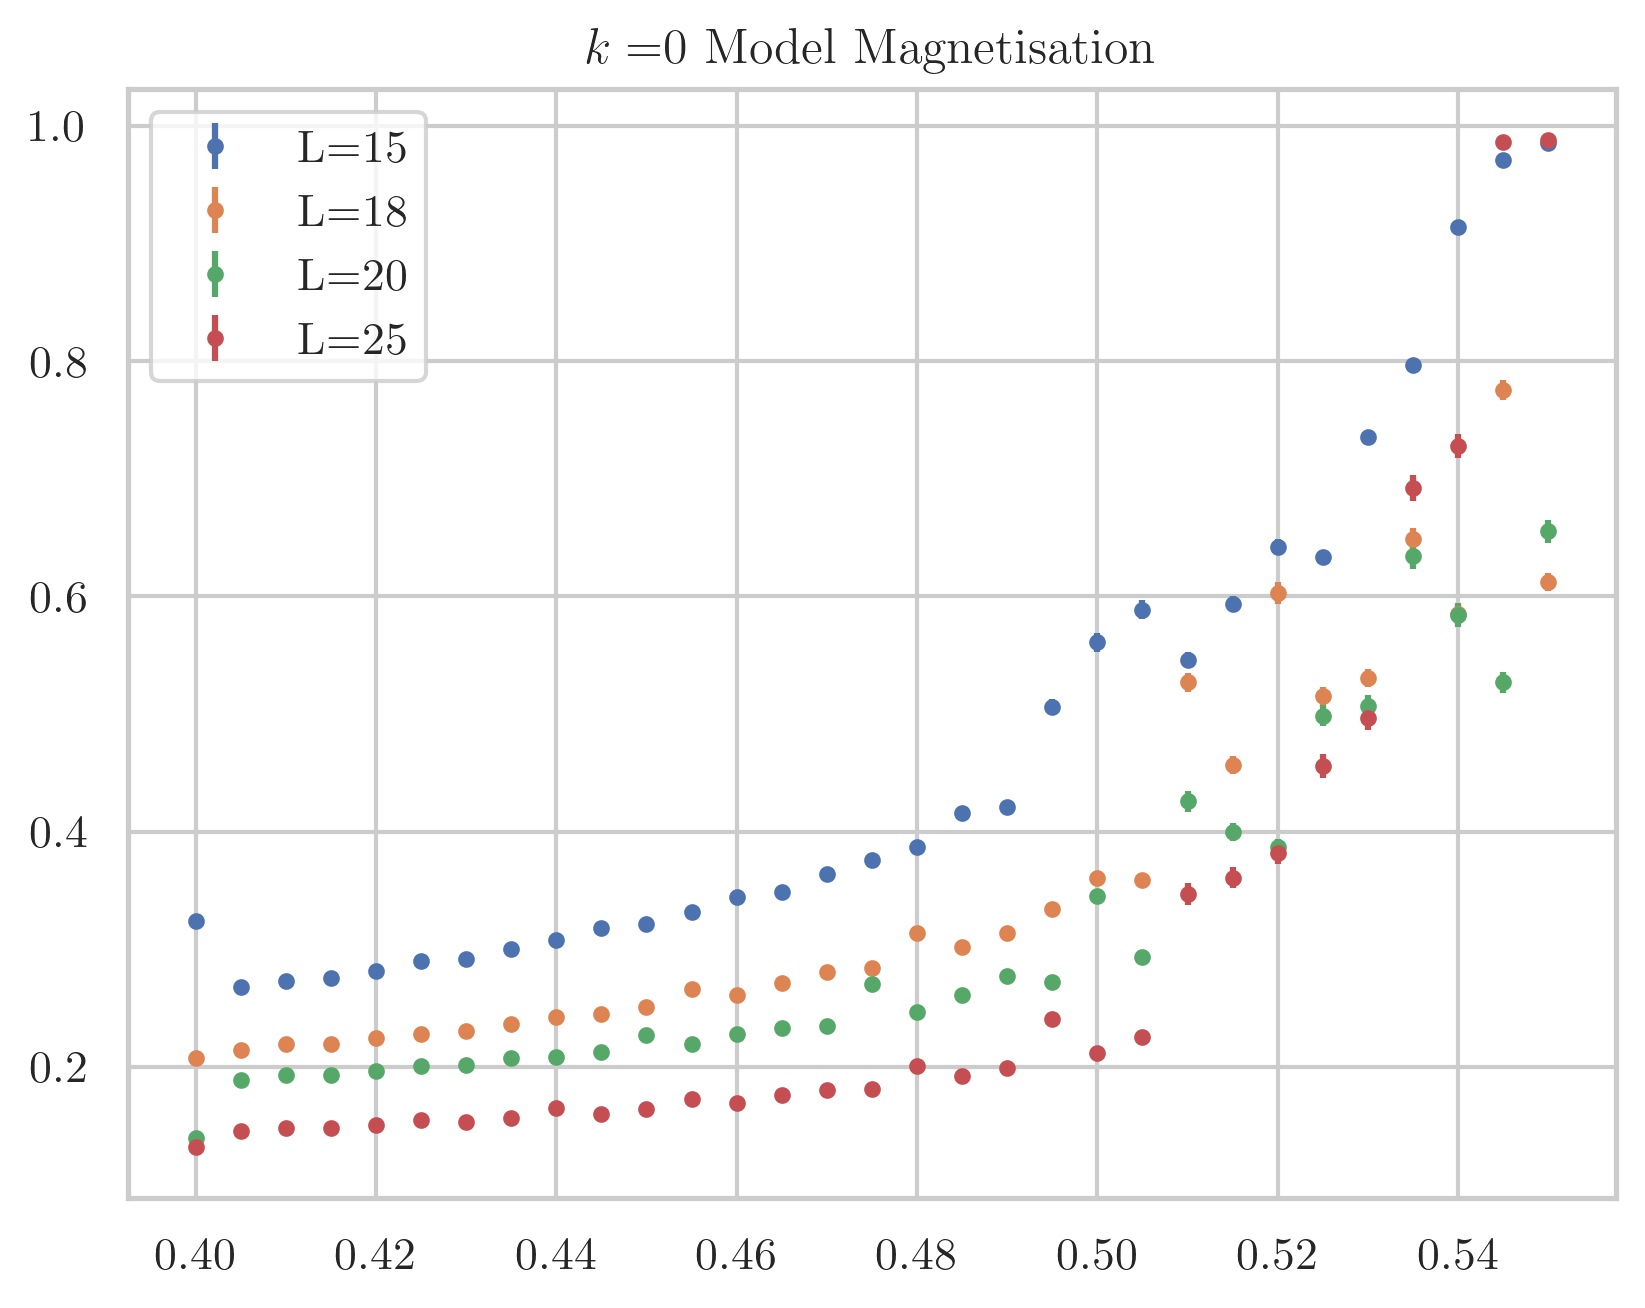

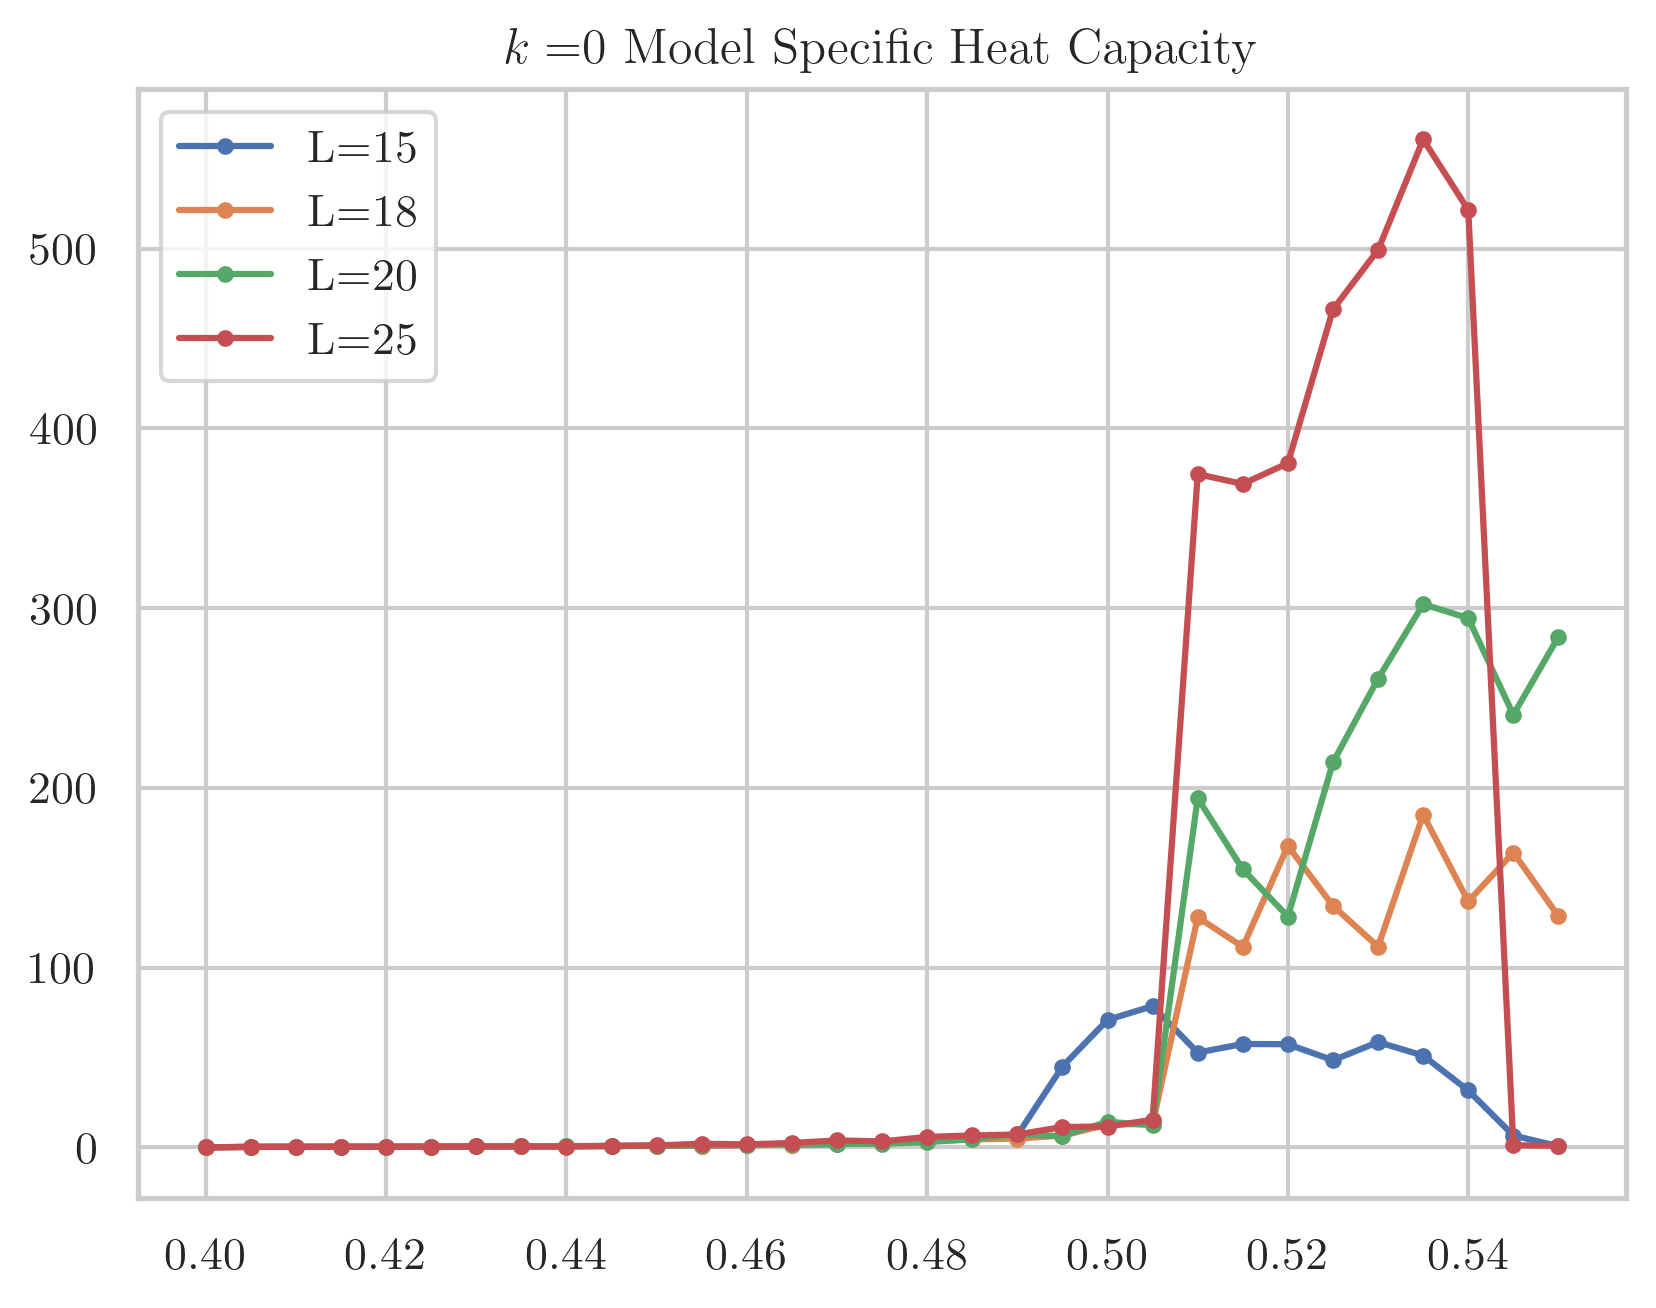

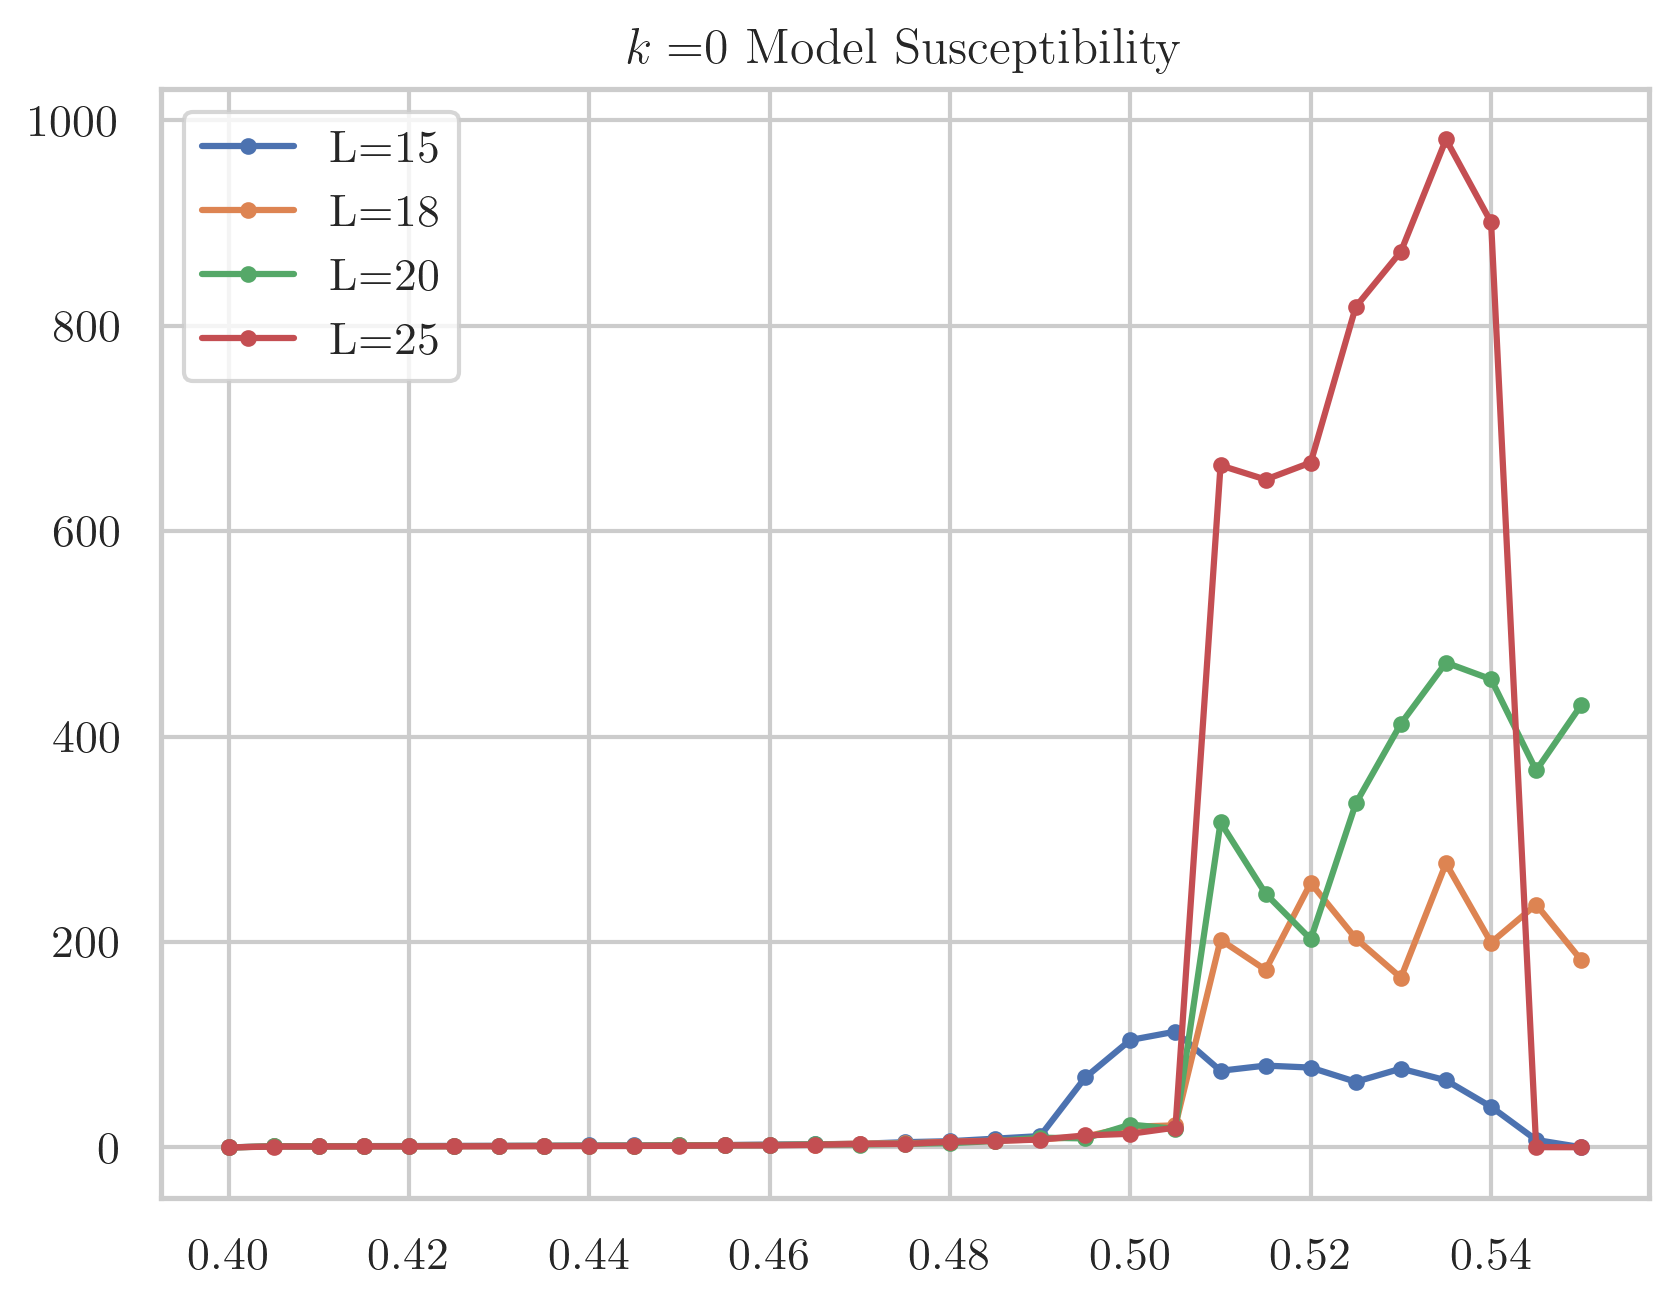

In [5]:
k=0
temps, meanData15, stdData15 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL15k'+"{:.6f}".format(k))
temps, meanData18, stdData18 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL18k'+"{:.6f}".format(k))
temps, meanData20, stdData20 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k'+"{:.6f}".format(k))
temps, meanData25, stdData25 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL25k'+"{:.6f}".format(k))
N = 1000
plt.title(r'$k=$'+str(k)+' Model; Energy')
plt.errorbar(temps, meanData15[:,1], yerr=stdData15[:,1]/np.sqrt(N), fmt='.-', label='L=15')
plt.errorbar(temps, meanData18[:,1], yerr=stdData18[:,1]/np.sqrt(N), fmt='.-', label='L=18')
plt.errorbar(temps, meanData20[:,1], yerr=stdData20[:,1]/np.sqrt(N), fmt='.-', label='L=20')
plt.errorbar(temps, meanData25[:,1], yerr=stdData25[:,1]/np.sqrt(N), fmt='.-', label='L=25')
plt.legend()
# plt.ylim(-1,22)
plt.show()

plt.title(r'$k=$'+str(k)+' Model Magnetisation')
plt.errorbar(temps, meanData15[:,0], yerr=stdData15[:,0]/np.sqrt(N), fmt='._', label='L=15')
plt.errorbar(temps, meanData18[:,0], yerr=stdData18[:,0]/np.sqrt(N), fmt='._', label='L=18')
plt.errorbar(temps, meanData20[:,0], yerr=stdData20[:,0]/np.sqrt(N), fmt='._', label='L=20')
plt.errorbar(temps, meanData25[:,0], yerr=stdData25[:,0]/np.sqrt(N), fmt='._', label='L=25')
plt.legend()
plt.show()

plt.title(r'$k=$'+str(k)+' Model Specific Heat Capacity')
plt.plot(temps, specificHeatCapacity(stdData15[:,1], temps, 15), '.-', label='L=15')
plt.plot(temps, specificHeatCapacity(stdData18[:,1], temps, 18), '.-', label='L=18')
plt.plot(temps, specificHeatCapacity(stdData20[:,1], temps, 20), '.-', label='L=20')
plt.plot(temps, specificHeatCapacity(stdData25[:,1], temps, 25), '.-', label='L=25')
plt.legend()
plt.show()

plt.title(r'$k=$'+str(k)+' Model Susceptibility')
plt.plot(temps, susceptibility(stdData15[:,0], temps, 15), '.-', label='L=15')
plt.plot(temps, susceptibility(stdData18[:,0], temps, 18), '.-', label='L=18')
plt.plot(temps, susceptibility(stdData20[:,0], temps, 20), '.-', label='L=20')
plt.plot(temps, susceptibility(stdData25[:,0], temps, 25), '.-', label='L=25')
plt.legend()
plt.show()

/home/shashank/miniconda3/envs/neuralnets/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shashank/miniconda3/envs/neuralnets/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shashank/miniconda3/envs/neuralnets/lib/python3.11/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shashank/miniconda3/envs/neuralnets/lib/python3.11/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shashank/miniconda3/envs/neuralnets/lib/python3.11/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


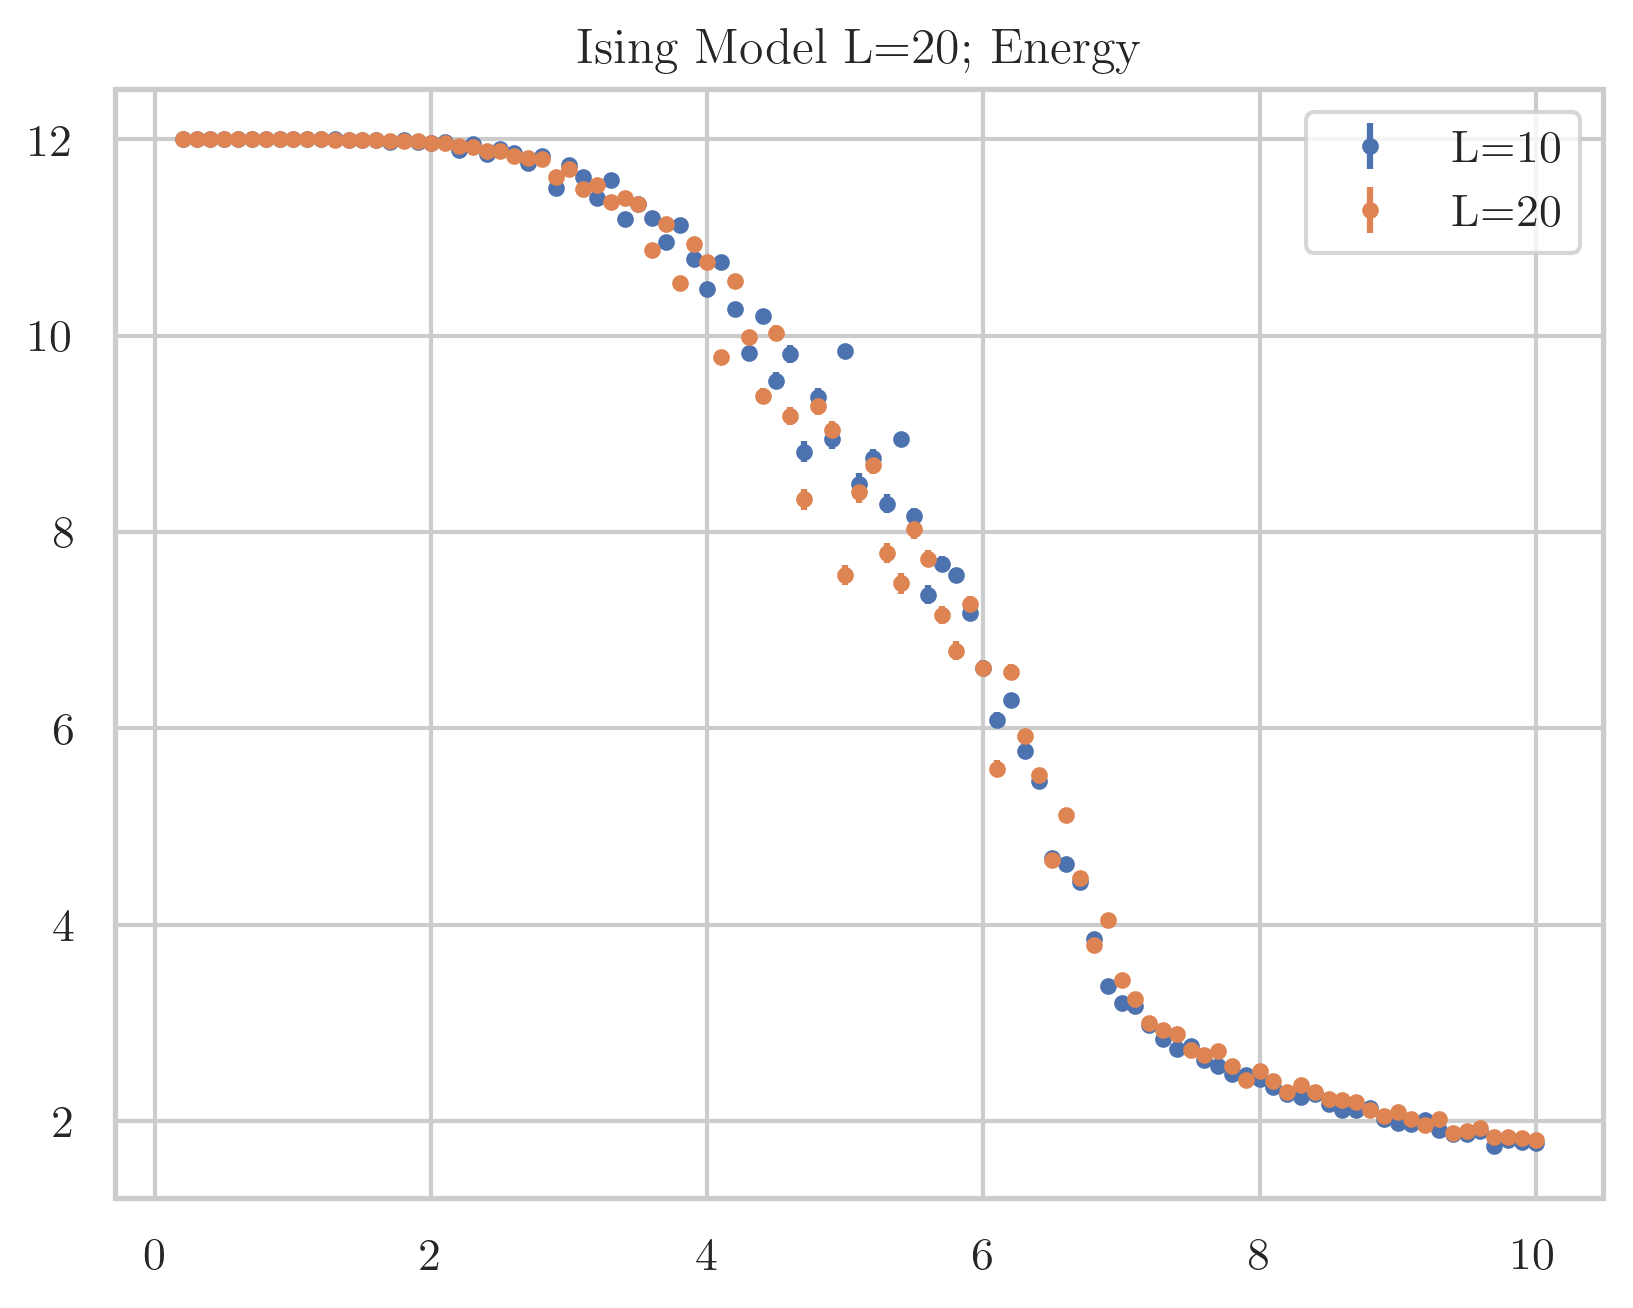

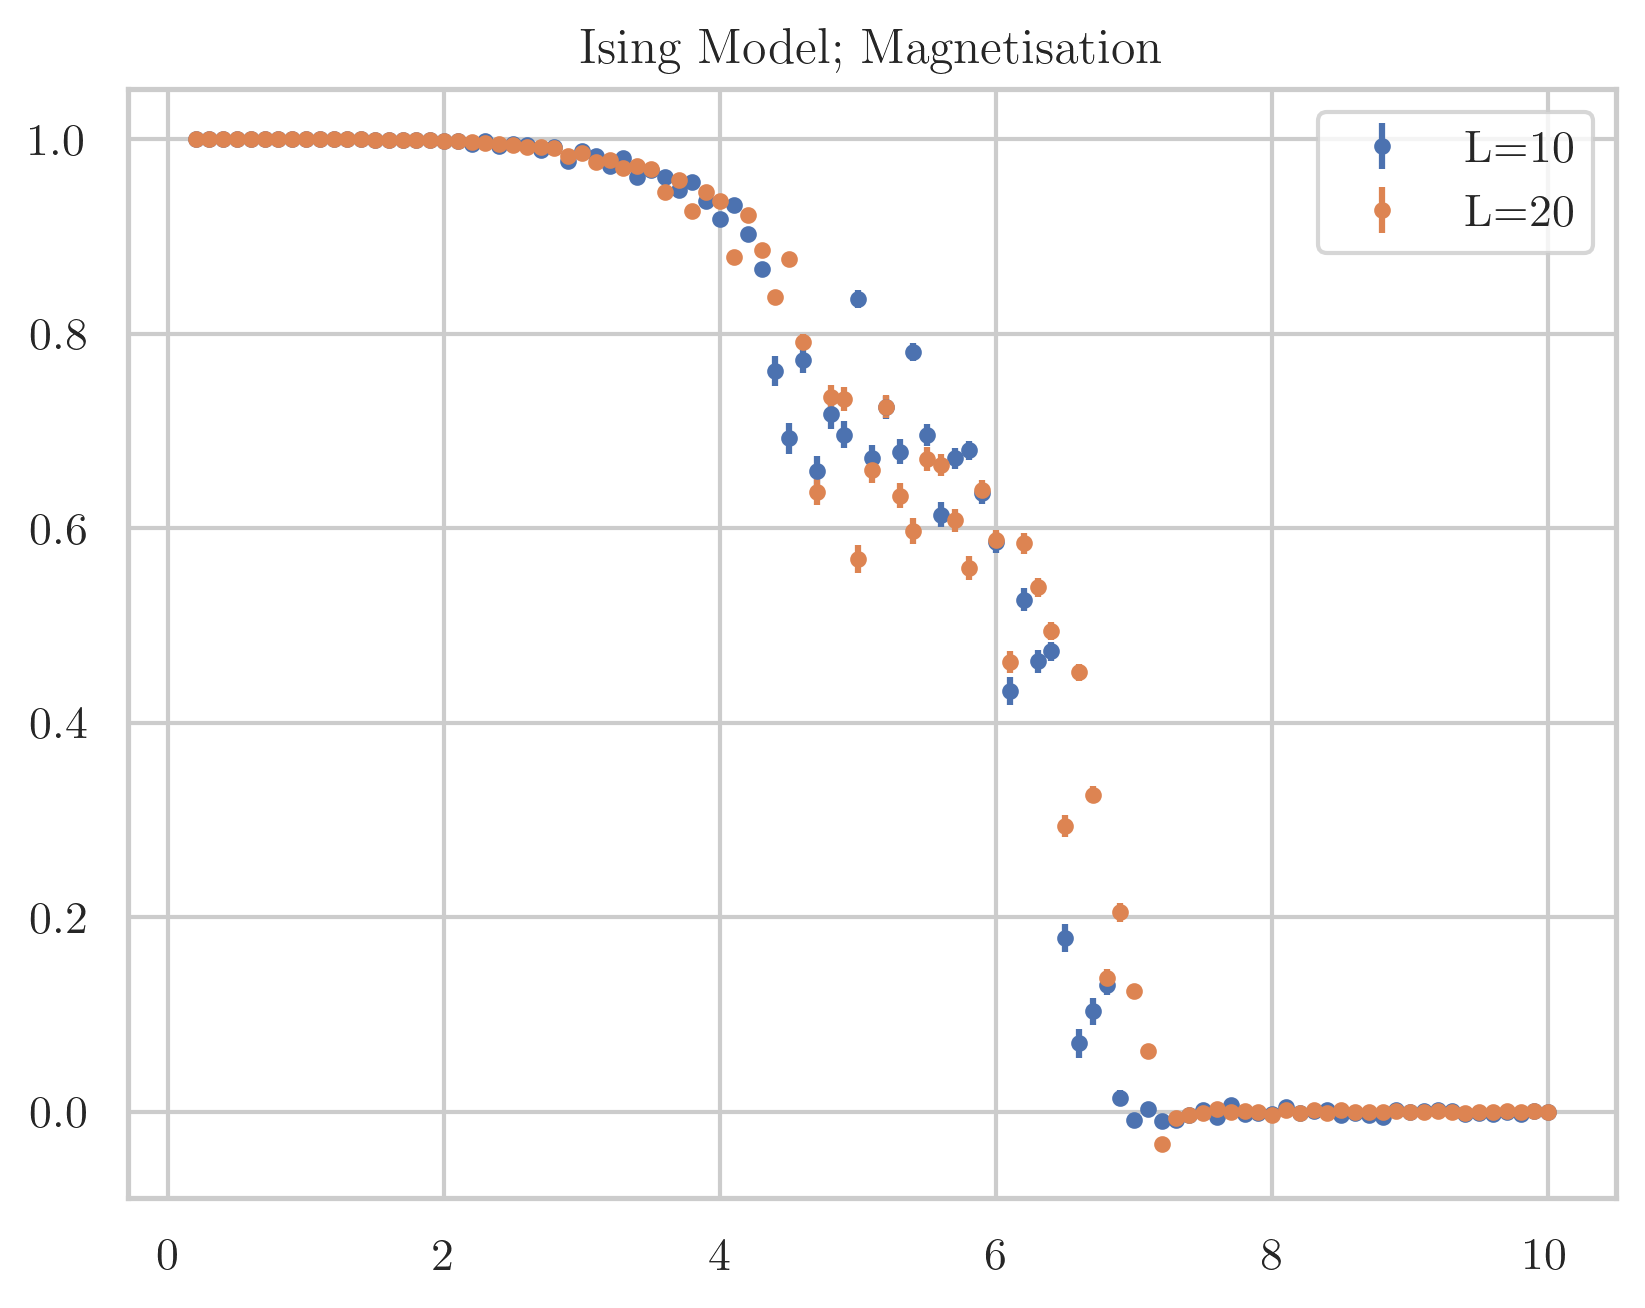

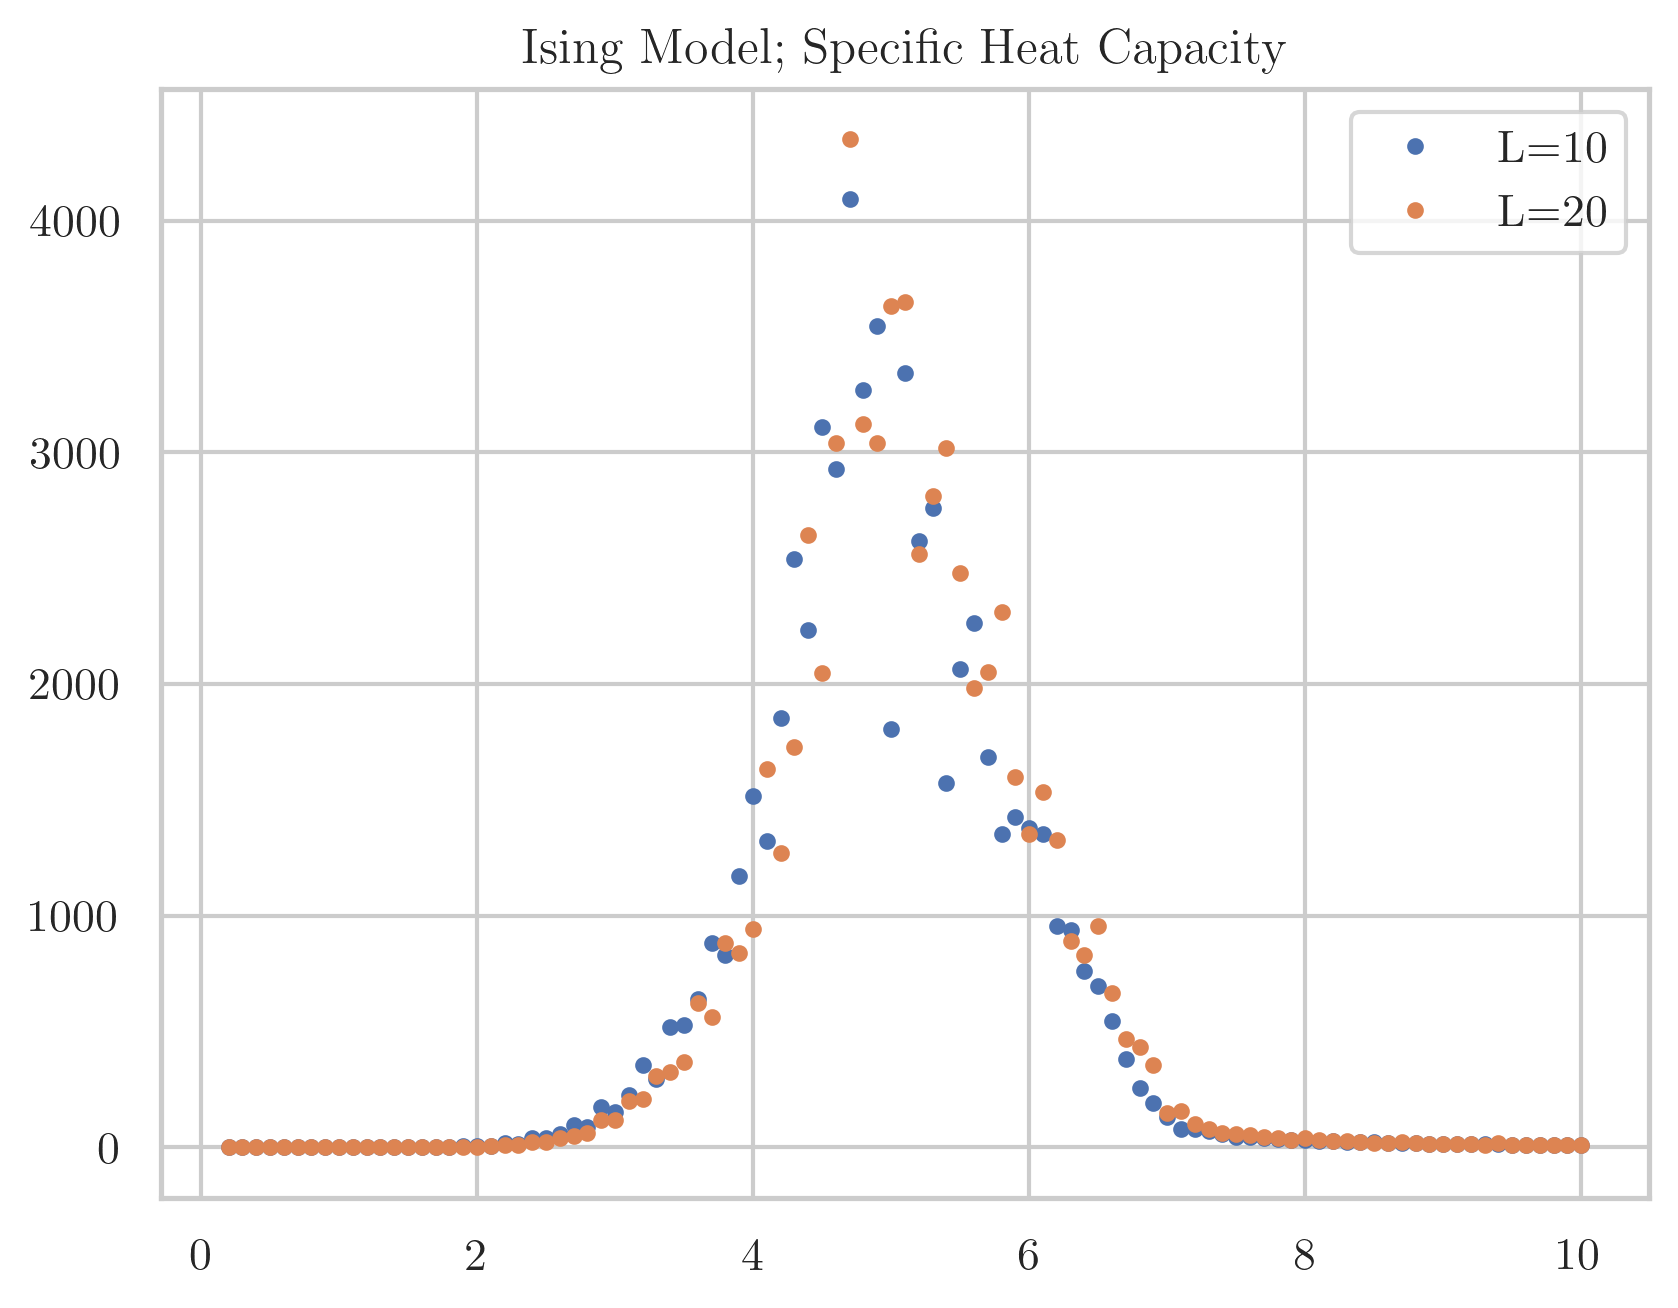

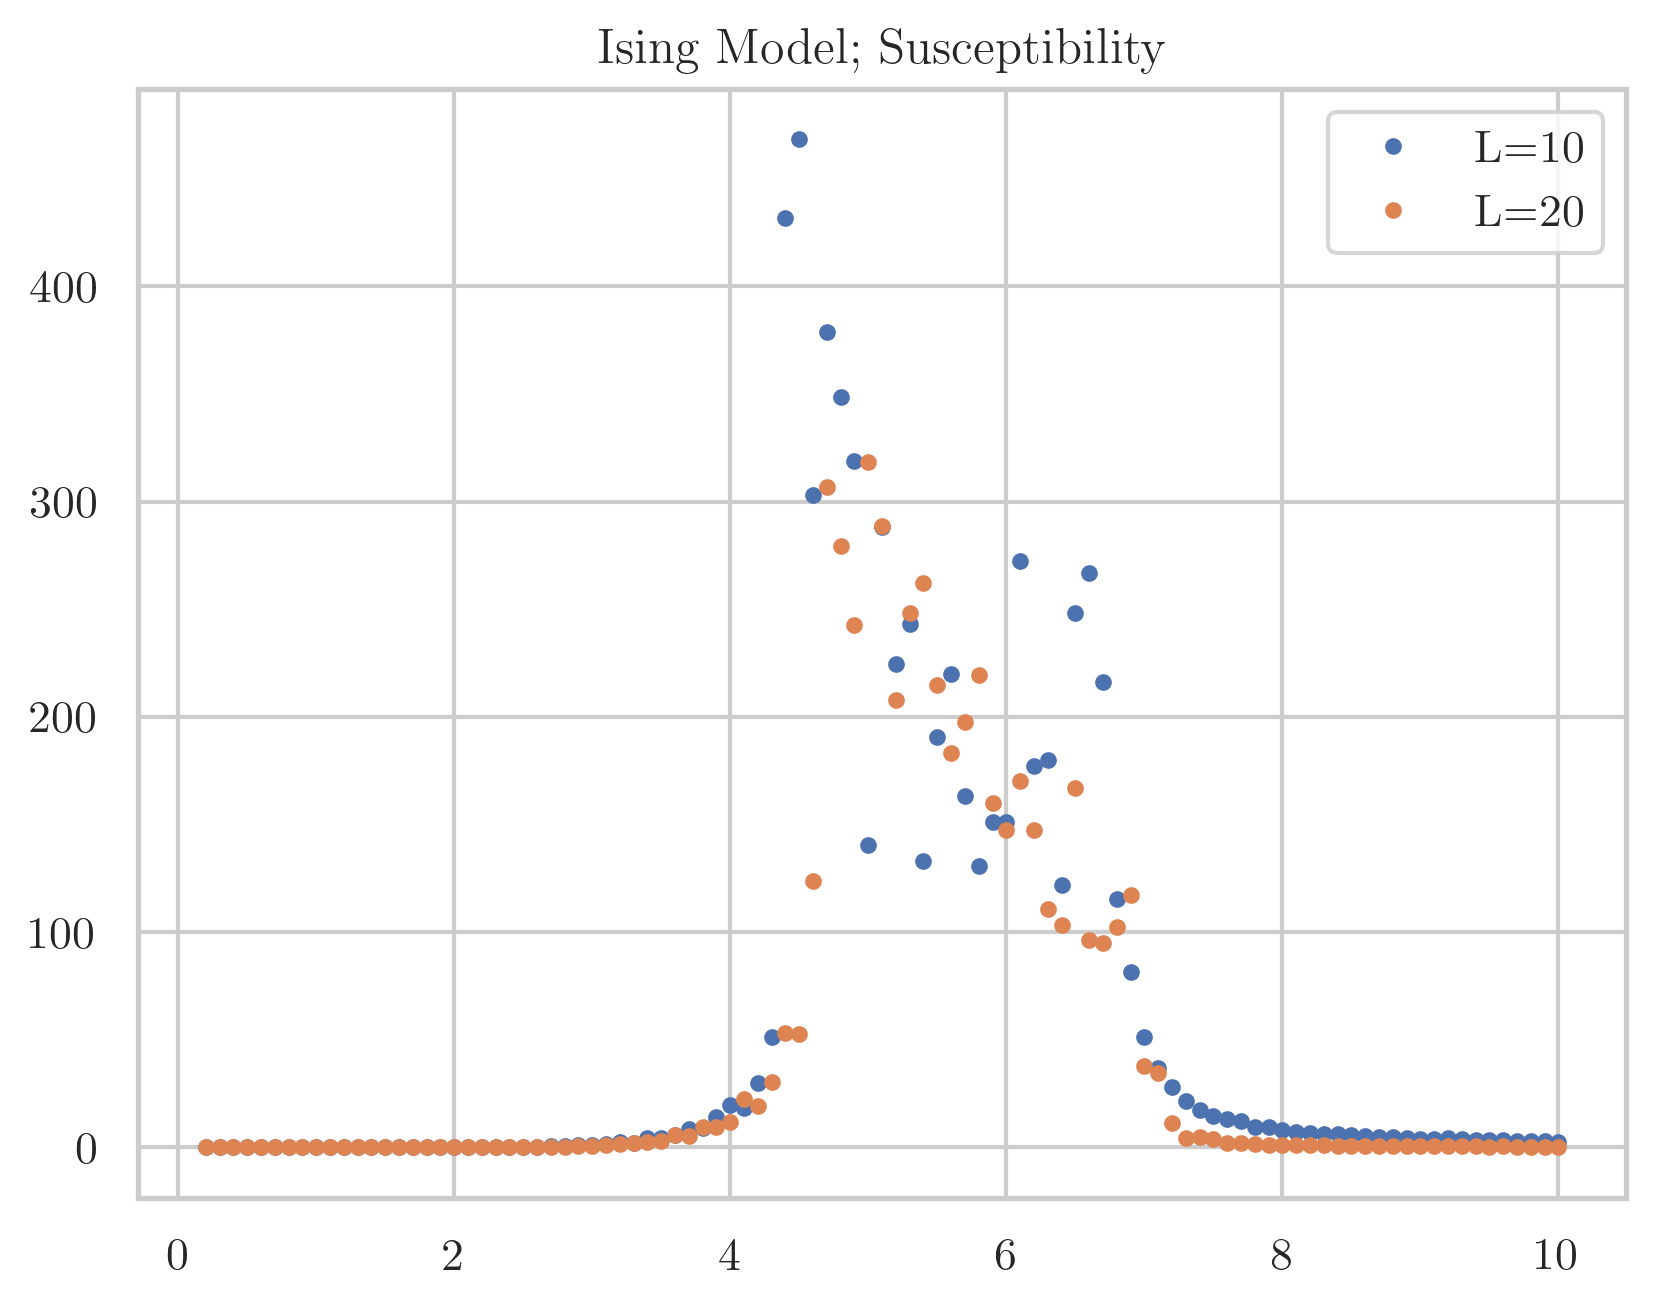

In [ ]:
temps, meanData20, stdData20 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL20k20.000000')
temps, meanData10, stdData10 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL10k40.000000')

plt.title('Ising Model L=20; Energy')
plt.errorbar(temps, meanData10[:,1], yerr=stdData10[:,1]/np.sqrt(1000), fmt='.', label='L=10')
plt.errorbar(temps, meanData20[:,1], yerr=stdData20[:,1]/np.sqrt(1000), fmt='.', label='L=20')
plt.legend()
plt.show()

plt.title('Ising Model; Magnetisation')
plt.errorbar(temps, meanData10[:,0], yerr=stdData10[:,0]/np.sqrt(1000), fmt='.', label='L=10')
plt.errorbar(temps, meanData20[:,0], yerr=stdData20[:,0]/np.sqrt(1000), fmt='.', label='L=20')
plt.legend()
plt.show()

plt.title('Ising Model; Specific Heat Capacity')
plt.plot(temps, specificHeatCapacity(stdData10[:,1], temps, 20), '.', label='L=10')
plt.plot(temps, specificHeatCapacity(stdData20[:,1], temps, 20), '.', label='L=20')
plt.legend()
plt.show()

plt.title('Ising Model; Susceptibility')
plt.plot(temps, susceptibility(stdData10[:,0], temps, 20), '.', label='L=10')
plt.plot(temps, susceptibility(stdData20[:,0], temps, 20), '.', label='L=20')
plt.legend()
plt.show()

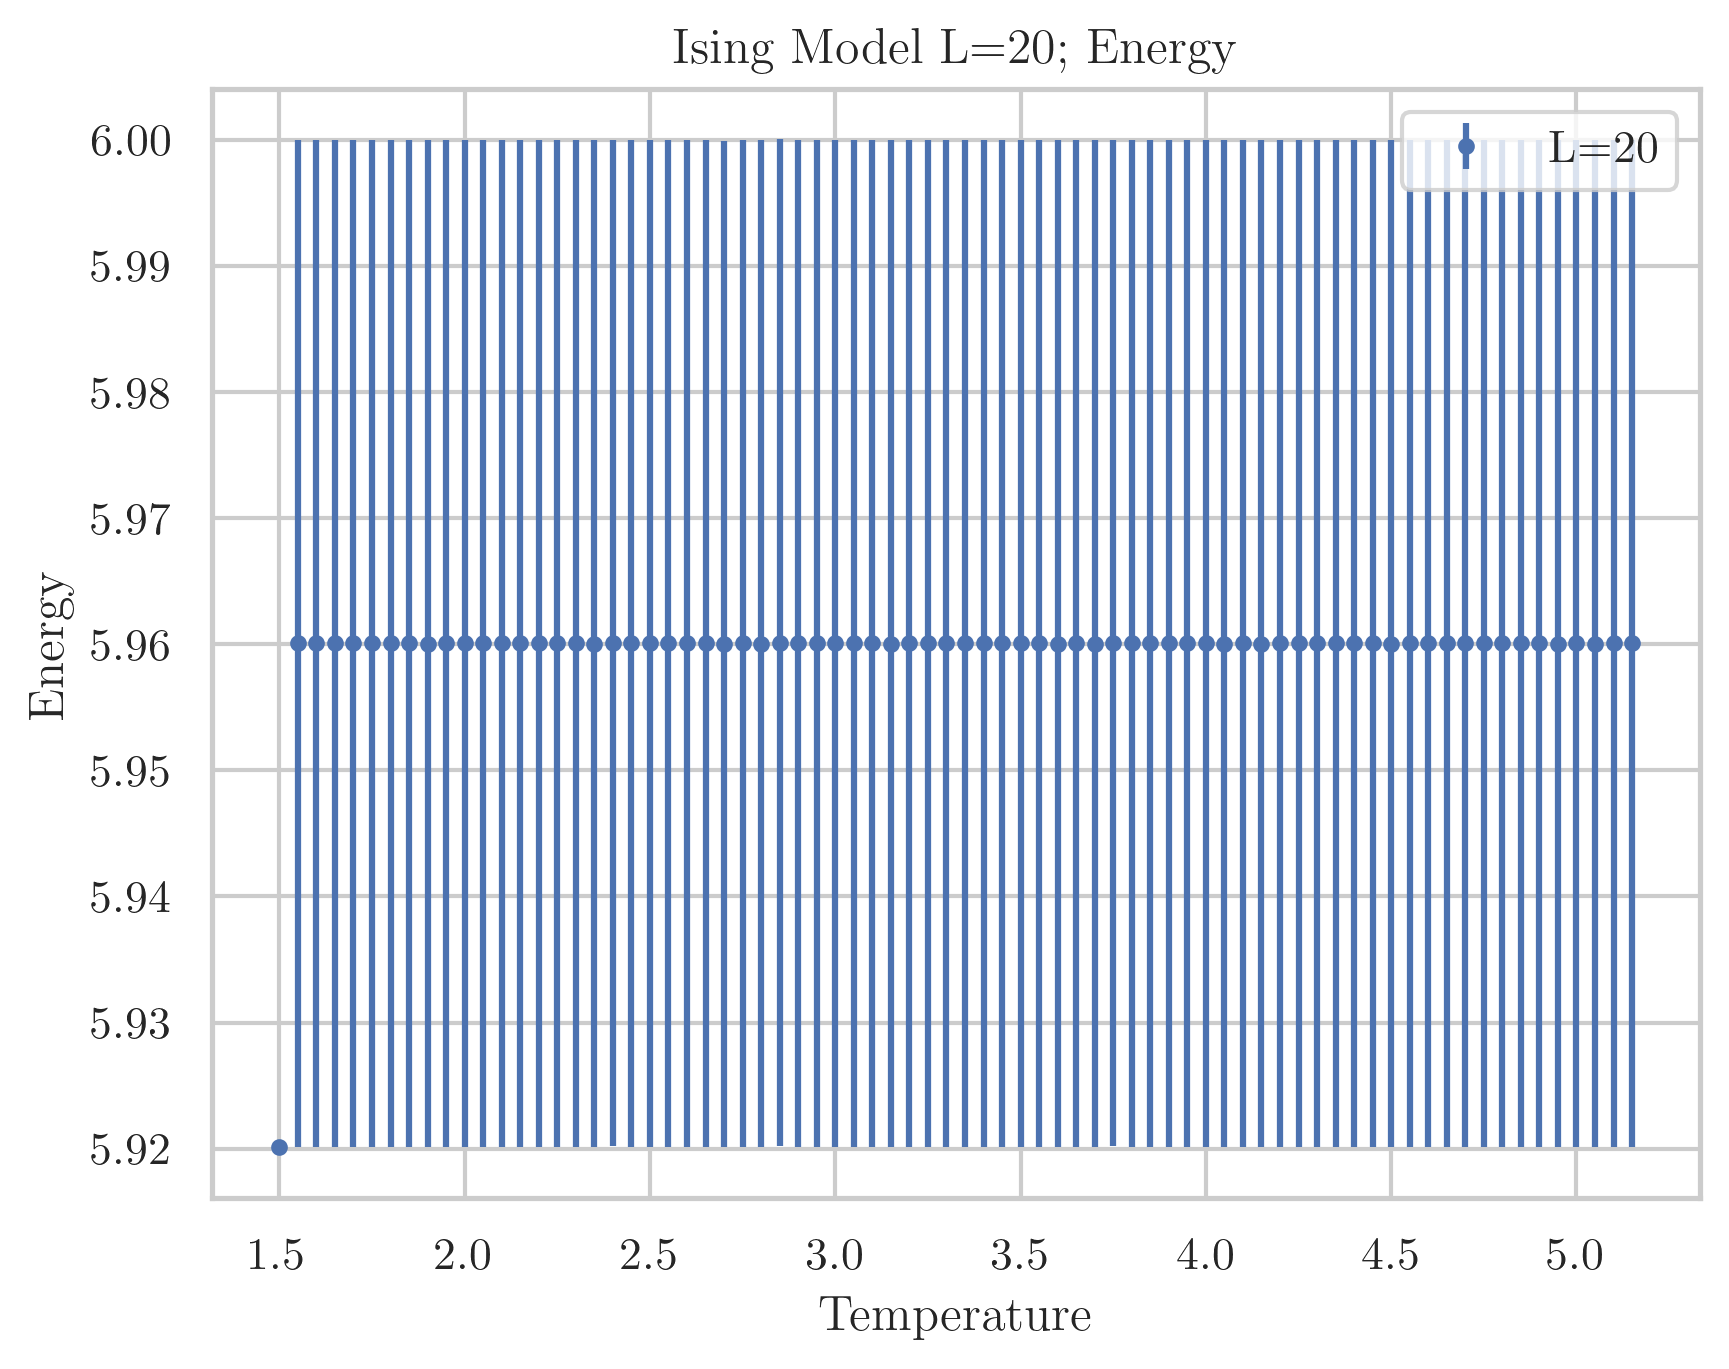

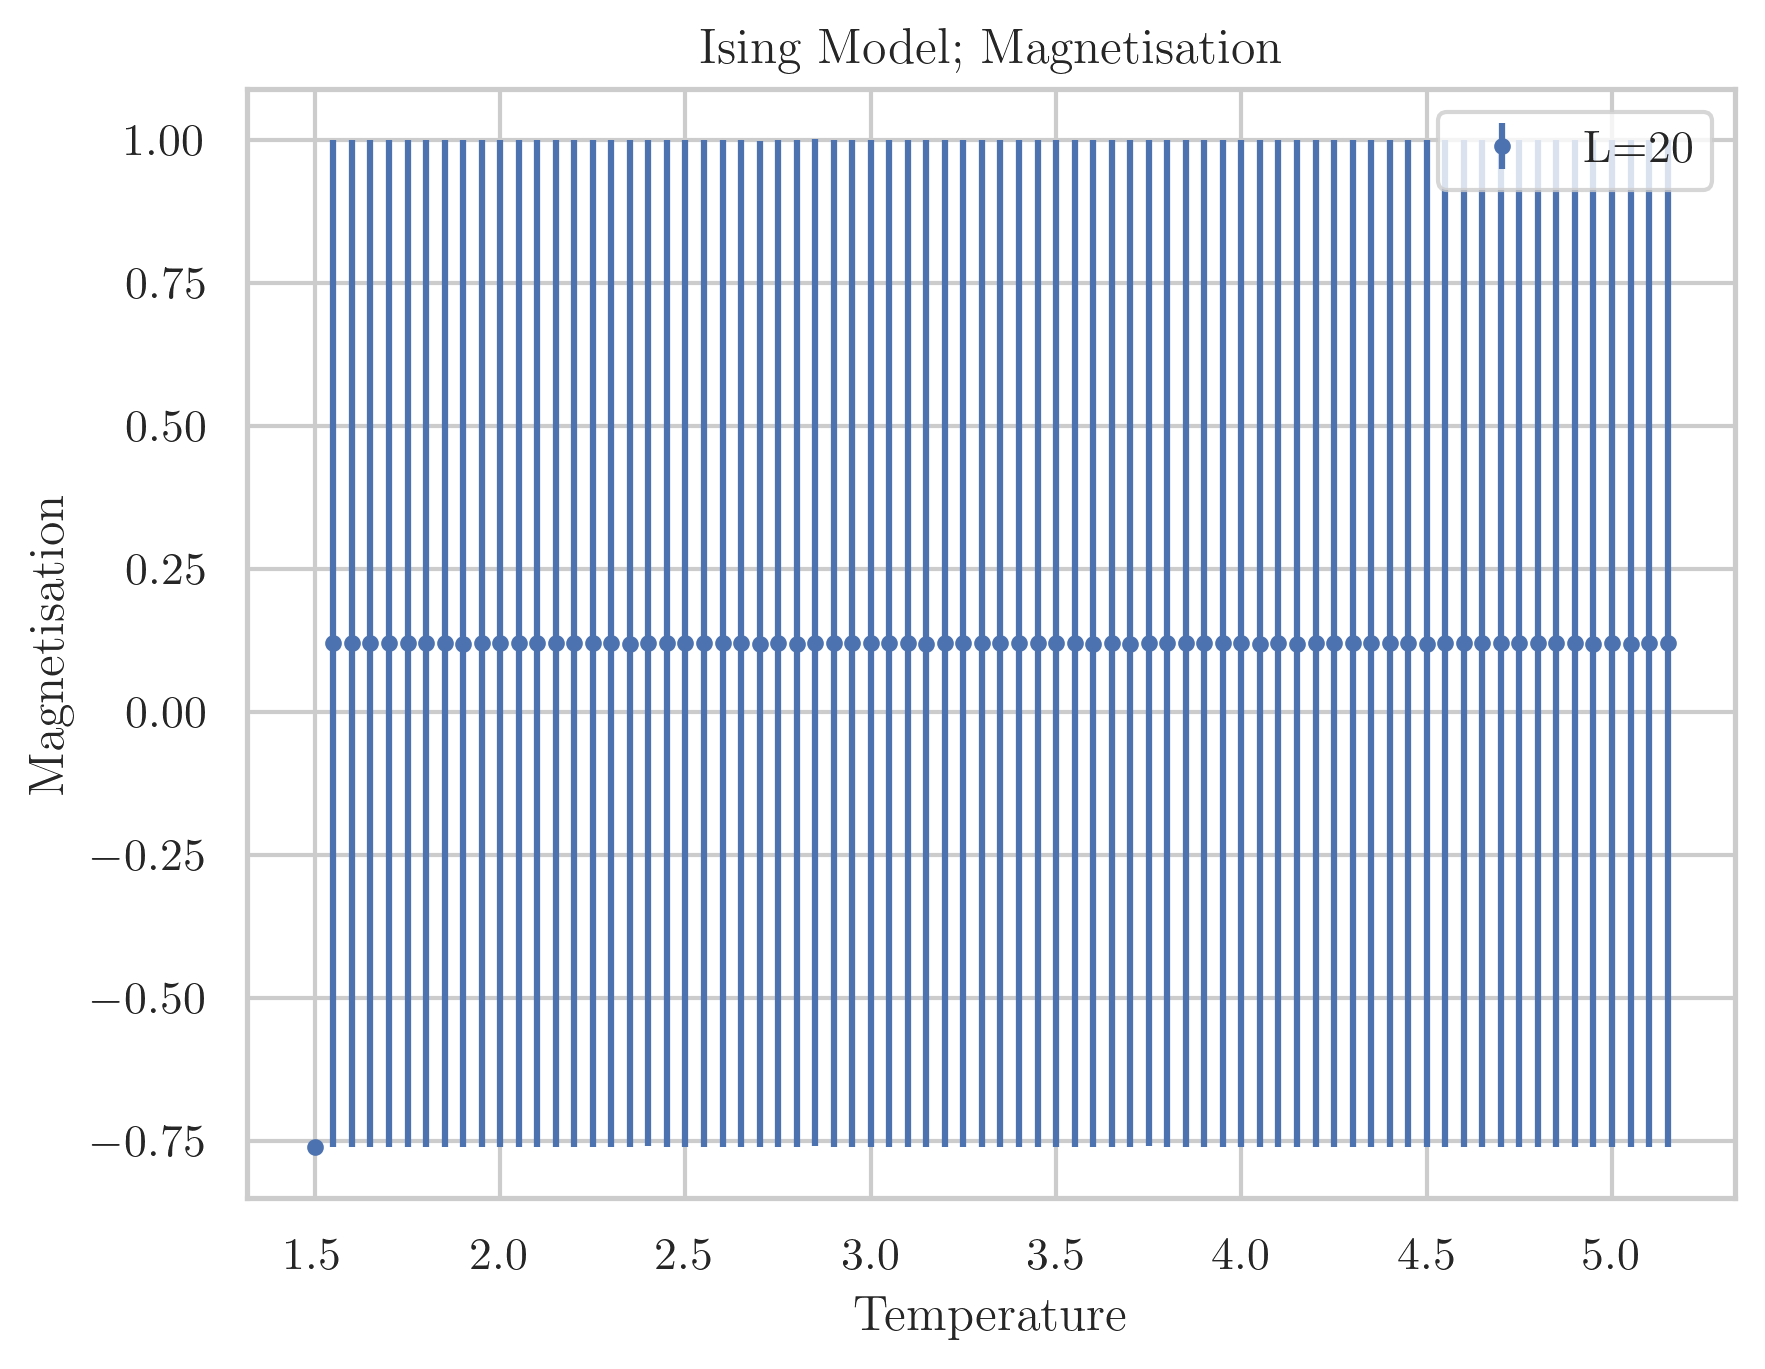

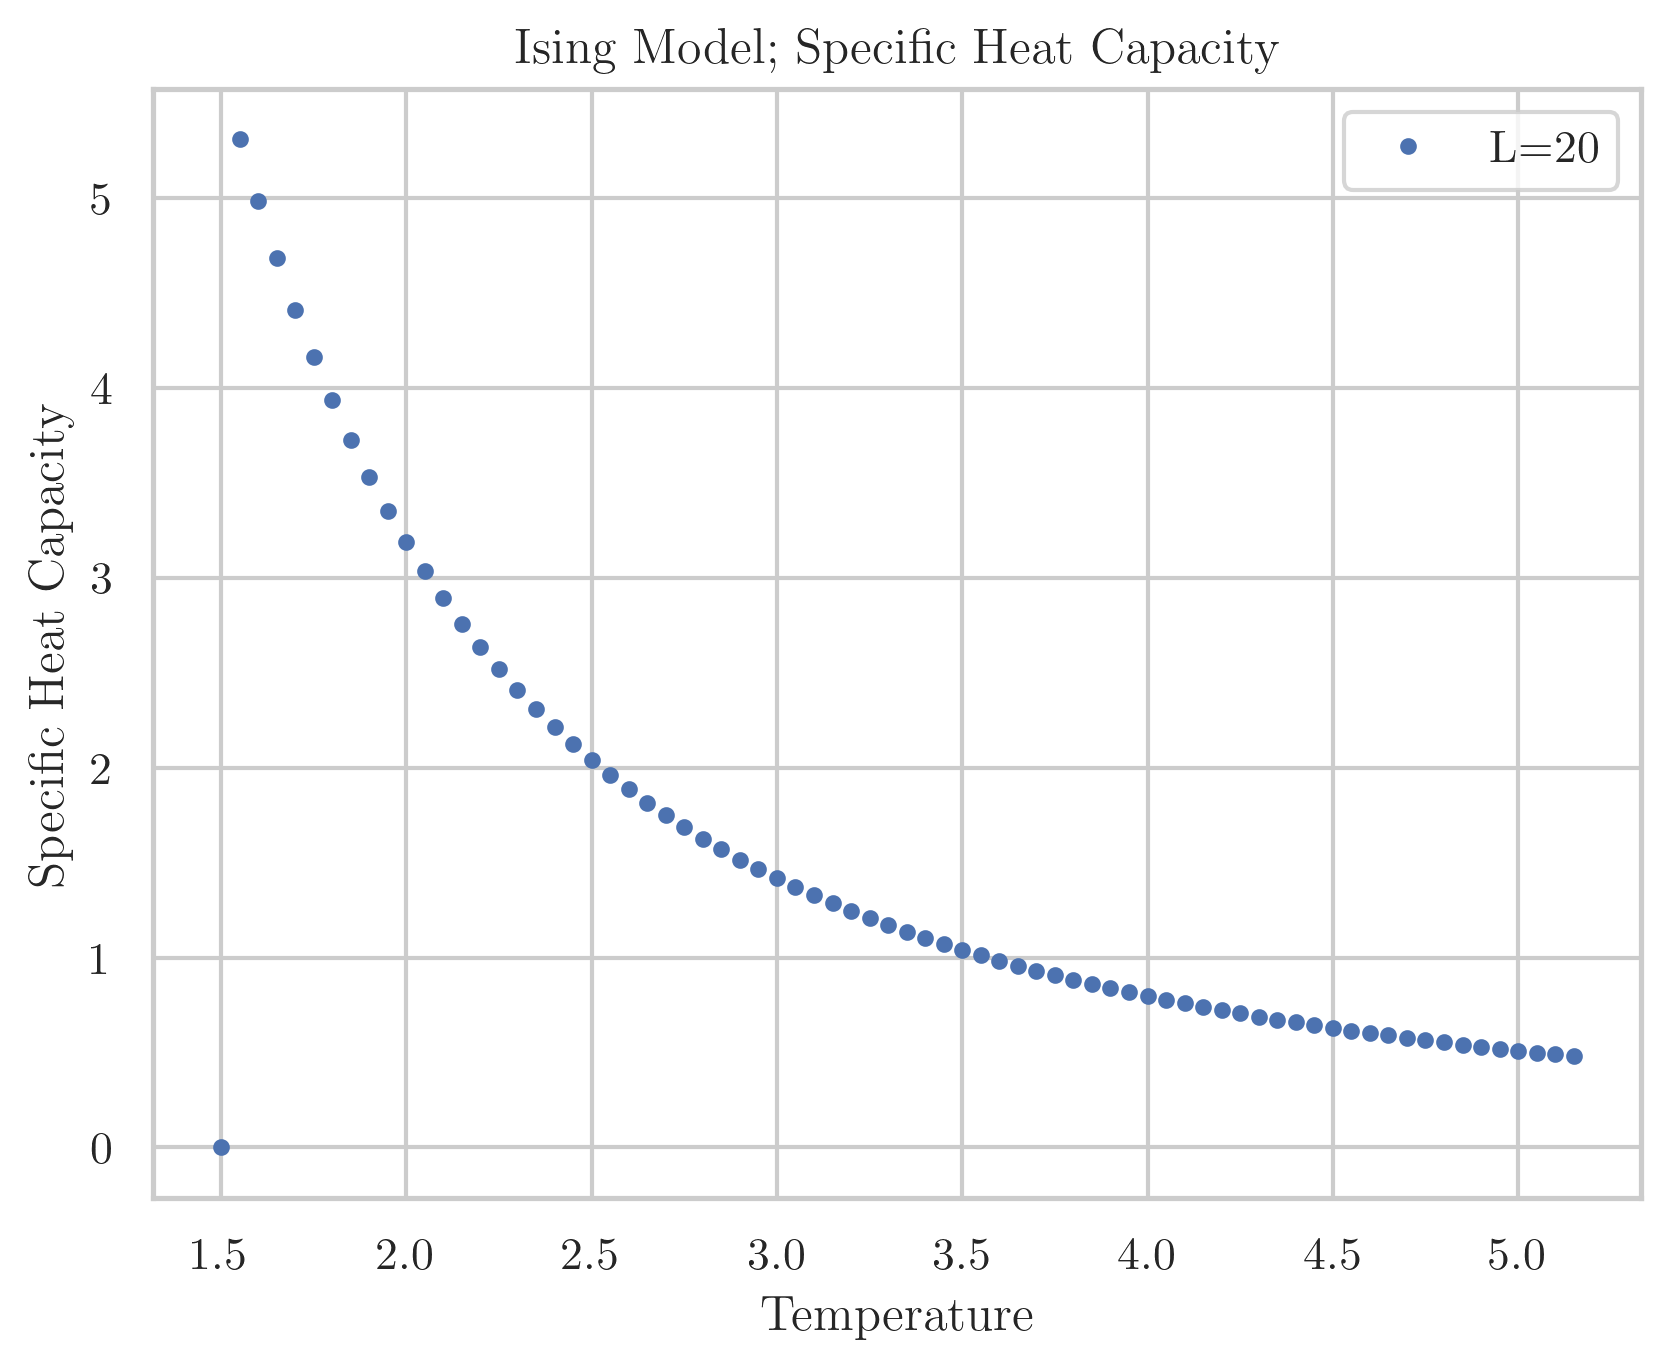

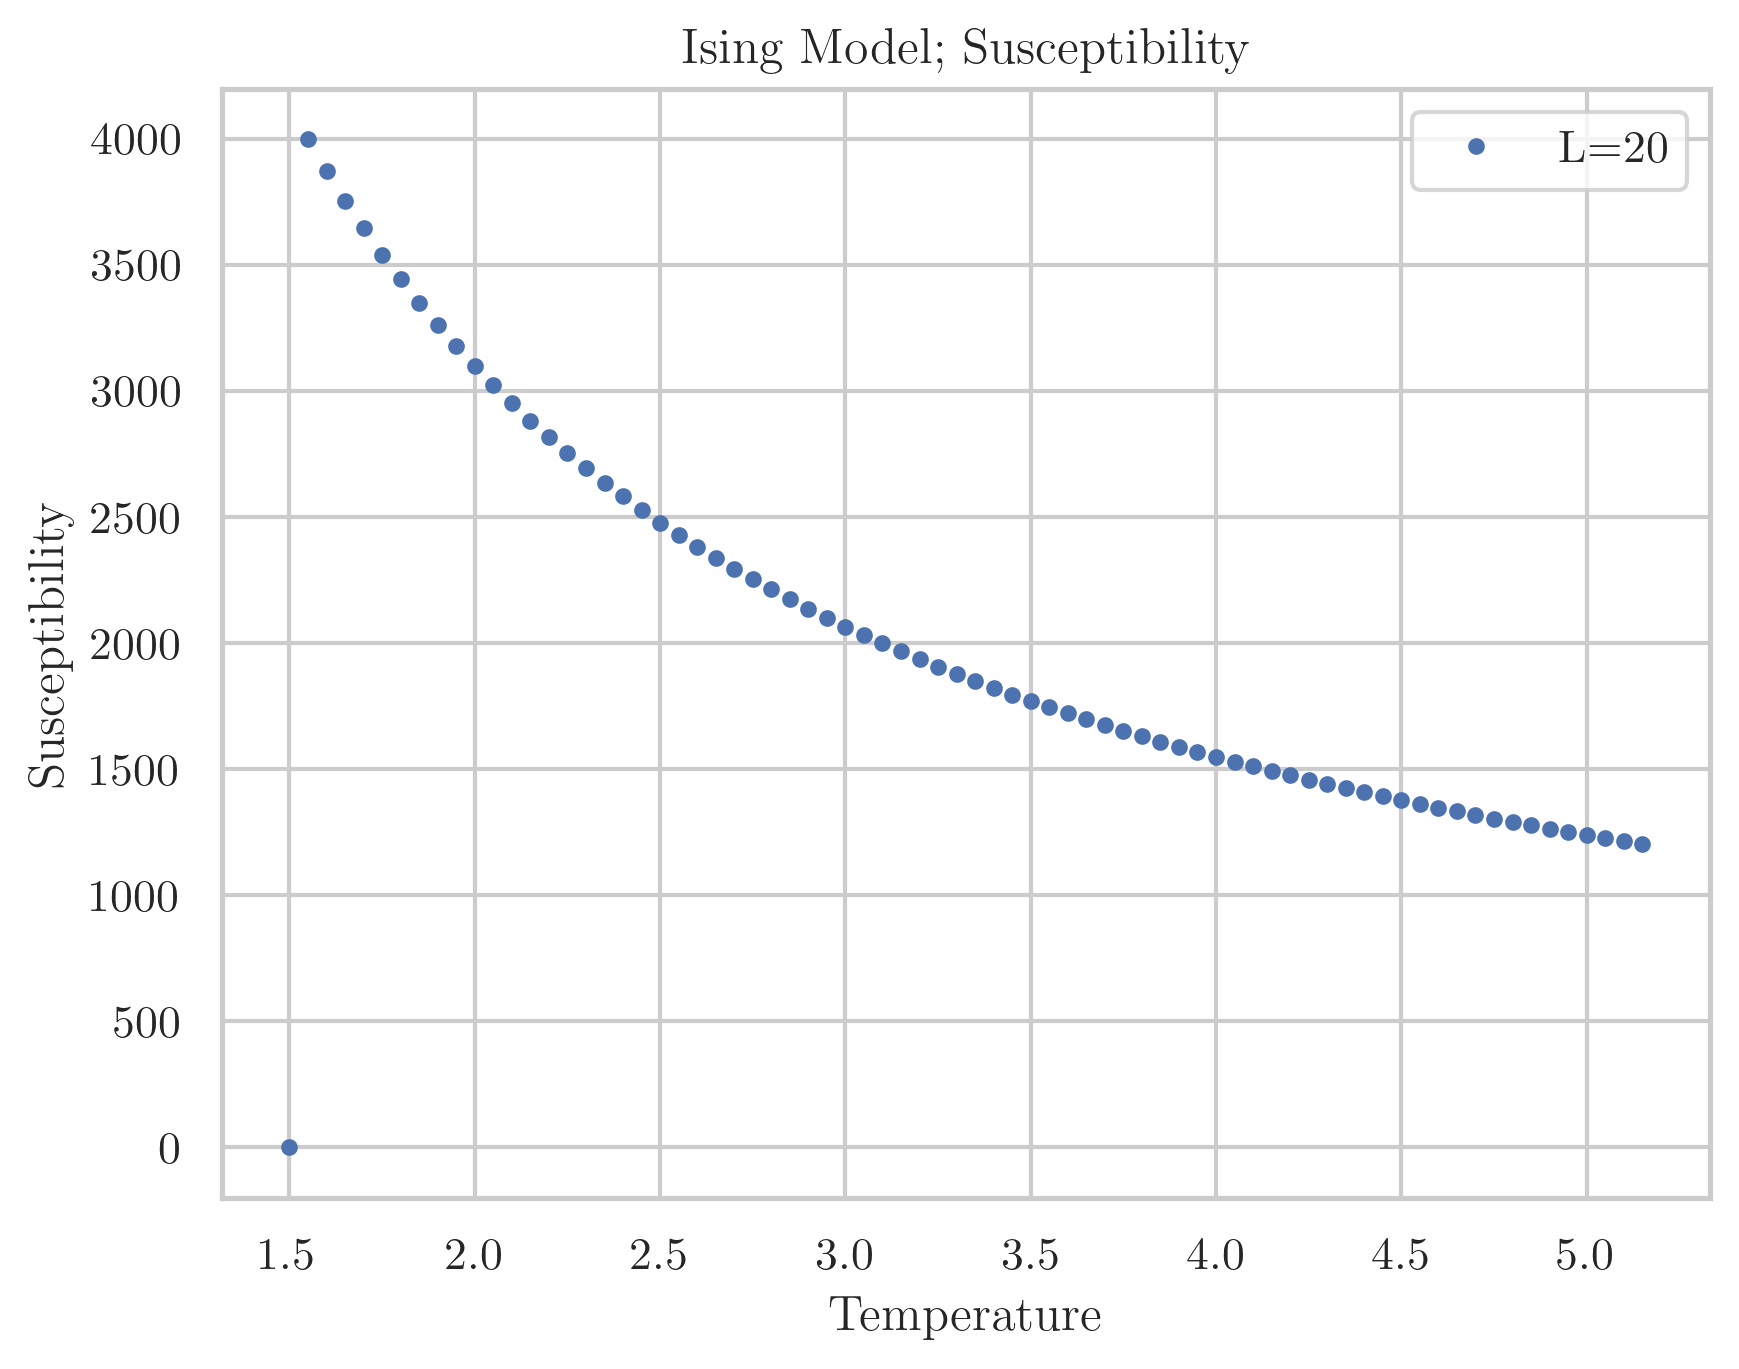

In [3]:
temps, meanData20, stdData20 = computeMeansAndStds('/home/shashank/Code/gonihedric/bin/dataL24k0.000000')
plt.title('Ising Model L=20; Energy')
N = 1
plt.errorbar(temps, meanData20[:,1], yerr=stdData20[:,1]/np.sqrt(N), fmt='.', label='L=20')
plt.ylabel('Energy')
plt.xlabel('Temperature')
plt.legend()
plt.show()

plt.title('Ising Model; Magnetisation')
plt.errorbar(temps, meanData20[:,0], yerr=stdData20[:,0]/np.sqrt(N), fmt='.', label='L=20')
plt.xlabel('Temperature')
plt.ylabel('Magnetisation')
plt.legend()
plt.show()

plt.title('Ising Model; Specific Heat Capacity')
plt.plot(temps, specificHeatCapacity(stdData20[:,1], temps, 20), '.', label='L=20')
plt.xlabel('Temperature')
plt.ylabel('Specific Heat Capacity')
plt.legend()
plt.show()

plt.title('Ising Model; Susceptibility')
plt.plot(temps, susceptibility(stdData20[:,0], temps, 20), '.', label='L=20')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.legend()
plt.show()